In [ ]:
import pandas as pd

table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
New_table= table[0]
New_table.head()

Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989

In [ ]:
from datetime import datetime
# Stocks that Have Data Available from 2010
New_table_2 = New_table[ [ datetime.strptime(dt, '%Y-%m-%d') < datetime(2010, 1, 1) for dt in New_table['Date added'] ] ]
New_table_2

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
2      ABT                Abbott             Health Care   
5     ADBE            Adobe Inc.  Information Technology   
7      AES       AES Corporation               Utilities   
8      AFL                 Aflac              Financials   
..     ...                   ...                     ...   
495   WYNN          Wynn Resorts  Consumer Discretionary   
496    XEL           Xcel Energy               Utilities   
498    YUM           Yum! Brands  Consumer Discretionary   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
2                           Health Care Equipment  North Chicago, Illinois   
5                            Application Software     San Jose, California   
7    Independent Power Producers & Energy Traders      Arlington, Virginia   
8                         Life & Health Insurance        Columbus, Georgia   
..                                            ...                      ...   
495                              Casinos & Gaming         Paradise, Nevada   
496                               Multi-Utilities   Minneapolis, Minnesota   
498                                   Restaurants     Louisville, Kentucky   
500                         Health Care Equipment          Warsaw, Indiana   
501                                Regional Banks     Salt Lake City, Utah   

     Date added      CIK Founded  
0    1957-03-04    66740    1902  
2    1957-03-04     1800    1888  
5    1997-05-05   796343    1982  
7    1998-10-02   874761    1981  
8    1999-05-28     4977    1955  
..          ...      ...     ...  
495  2008-11-14  1174922    2002  
496  1957-03-04    72903    1909  
498  1997-10-06  1041061    1997  
500  2001-08-07  1136869    1927  
501  2001-06-22   109380    1873  

[290 rows x 8 columns]

In [ ]:
import yfinance as yf

# Downloading historical stock data for selected stocks using Yahoo Finance
historical_data = {}
for symbol in New_table_2['Symbol']:
    try:
        stock_data = yf.download(symbol, start='2010-01-01', interval= '1mo')
        historical_data[symbol] = stock_data
    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")

# Displaying the downloaded data (you can modify this part based on your needs)
for symbol, data in historical_data.items():
    print(f"\nHistorical data for {symbol}:\n{data.head()}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1mo 2010-01-01 -> 2023-12-21)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

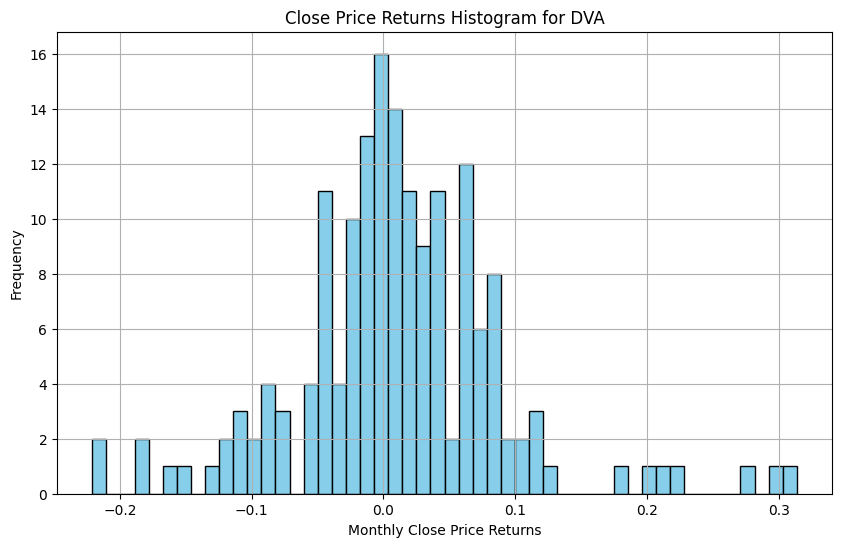

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a stock symbol randomly from the downloaded data
random_stock_symbol = np.random.choice(list(historical_data.keys()))

# Get the close prices for the chosen stock
close_prices = historical_data[random_stock_symbol]['Close']

# Calculate daily close price returns
daily_returns = close_prices.pct_change().dropna()

# Plotting the histogram of close price returns
plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=50, color='skyblue', edgecolor='black')
plt.title(f"Close Price Returns Histogram for {random_stock_symbol}")
plt.xlabel("Monthly Close Price Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Candlestick chart

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


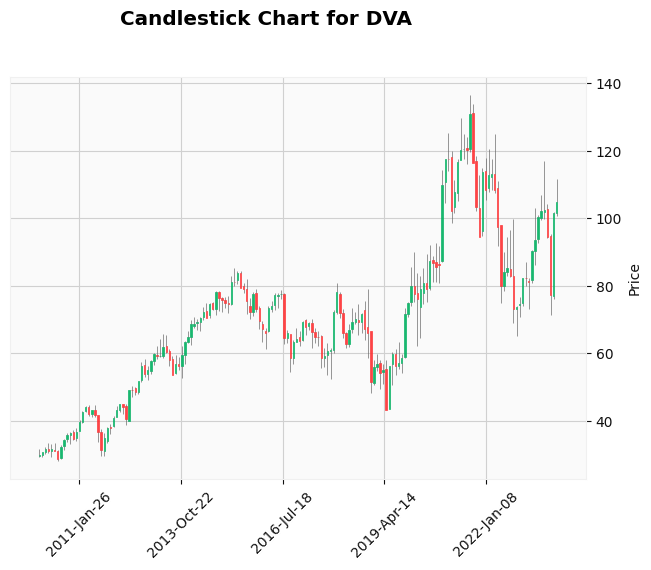

In [ ]:
import mplfinance as mpf

# Get the historical data for the chosen stock
stock_data = historical_data[random_stock_symbol]

# Set the warn_too_much_data parameter to a value larger than the number of data points you want to plot
warn_too_much_data_value = 1000  # Set this to your preferred number of data points

# Plotting the Candlestick chart with reduced data points
mpf.plot(stock_data[-warn_too_much_data_value:], type='candle', style='yahoo',
         title=f'Candlestick Chart for {random_stock_symbol}', ylabel='Price', ylabel_lower='Volume',
         show_nontrading=True, warn_too_much_data=warn_too_much_data_value)

# Selected Data

In [ ]:
import yfinance as yf

# List of stocks to keep
selected_stocks = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']

# Create a dictionary to store the filtered historical data for selected stocks
filtered_historical_data = {}

# Download historical stock data for selected stocks using Yahoo Finance
for symbol in selected_stocks:
    try:
        stock_data = yf.download(symbol, start='2010-01-01', end='2023-12-31', interval='1mo')
        filtered_historical_data[symbol] = stock_data
    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")

# Displaying the filtered data for the selected stocks
for symbol, data in filtered_historical_data.items():
    print(f"\nHistorical data for {symbol}:\n{data.head()}")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Historical data for AAPL:
                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2010-01-01  7.622500  7.699643  6.794643  6.859286   5.814477  15168994400
2010-02-01  6.870357  7.327500  6.816071  7.307857   6.194723  10776080000
2010-03-01  7.348214  8.481429  7.337500  8.392857   7.114455  12154172800
2010-04-01  8.478929  9.730714  8.312500  9.324643   7.904308  12367129600
2010-05-01  9.422857  9.567143  7.116071  9.174286   7.776858  18082654800

Historical data for MSFT:
                 Open       High        Low      Close  Adj Close      Volum

# LSTM, GRU, Bi-LSTM

------------------------------------------------------------------
Stock: AAPL

LSTM
Epoch 1/20
27/27 [==============================] - 8s 7ms/step - loss: 0.1820
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0848
Epoch 3/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0332
Epoch 4/20
27/27 [==============================] - 0s 5ms/step - loss: 0.0365
Epoch 5/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0309
Epoch 6/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0253
Epoch 7/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0201
Epoch 8/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0141
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0131
Epoch 10/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 11/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 12/20
27/27 [=========================

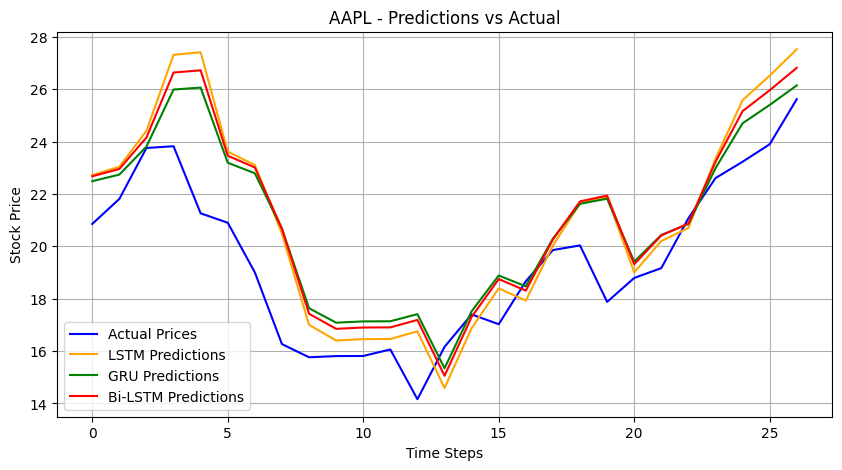


LSTM
Epoch 1/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 2/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 3/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 5/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 6/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 7/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 8/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 9/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 11/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 13/20
55/55 [========================

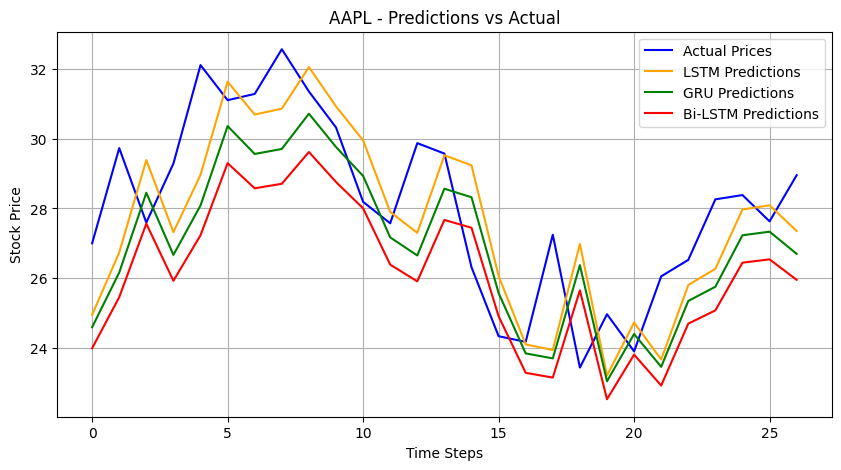


LSTM
Epoch 1/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0060
Epoch 2/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0047
Epoch 3/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 4/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0072
Epoch 5/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0050
Epoch 6/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0049
Epoch 7/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 8/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0051
Epoch 9/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0034
Epoch 10/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 11/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 12/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 13/20
83/83 [========================

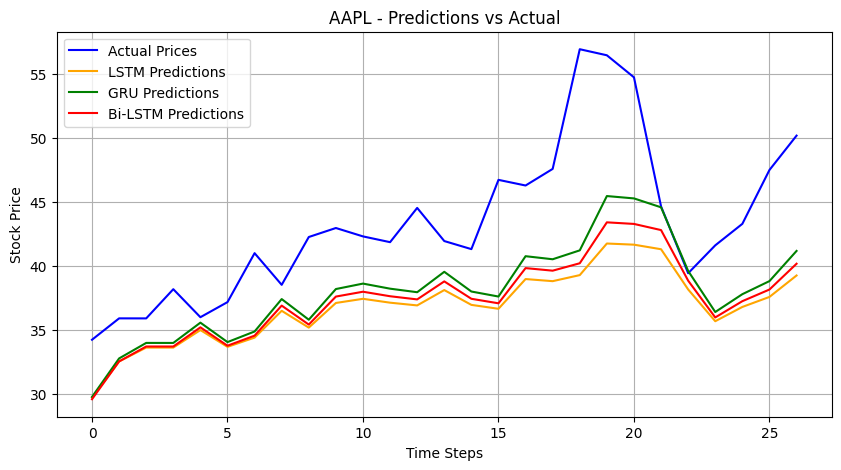


LSTM
Epoch 1/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0034
Epoch 2/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 3/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 4/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 5/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 6/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 7/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 8/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 9/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 10/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 11/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 12/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 13/20
111/111

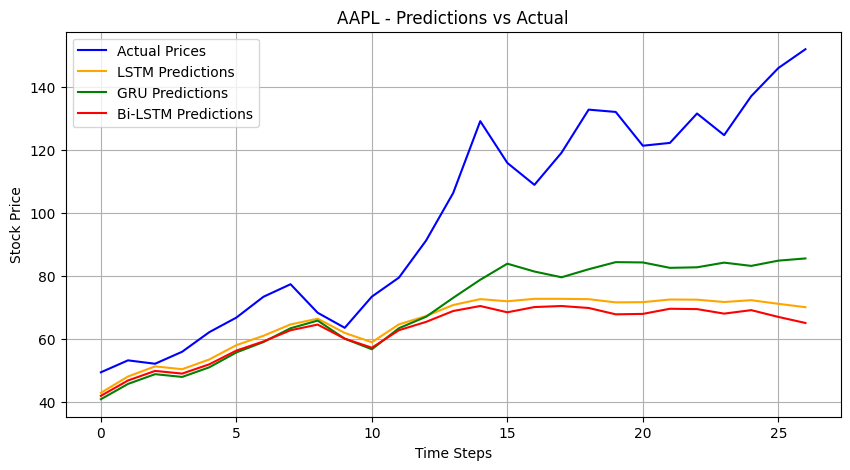


LSTM
Epoch 1/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 2/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 3/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 4/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 5/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 6/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 7/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 8/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 9/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 10/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 11/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 12/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 13/20
139/139

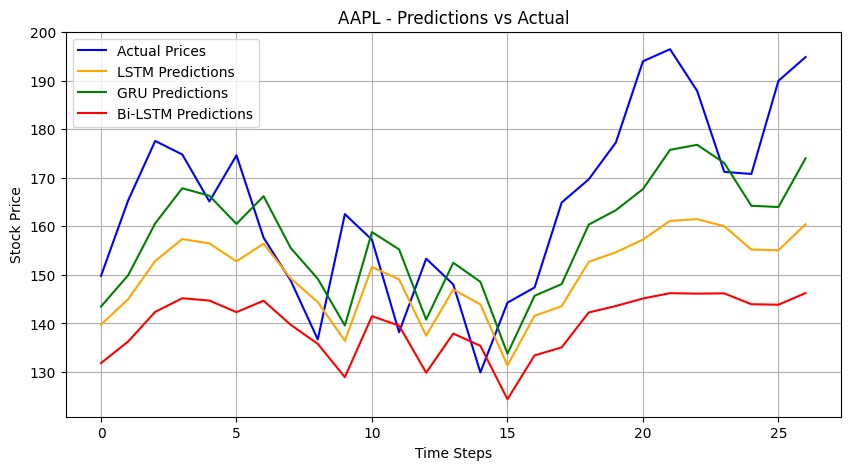

------------------------------------------------------------------
Stock: MSFT

LSTM
Epoch 1/20
27/27 [==============================] - 4s 7ms/step - loss: 0.2237
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 0.1126
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0561
Epoch 4/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0538
Epoch 5/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0522
Epoch 6/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0462
Epoch 7/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0466
Epoch 8/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0423
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0379
Epoch 10/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 11/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0384
Epoch 12/20
27/27 [=========================

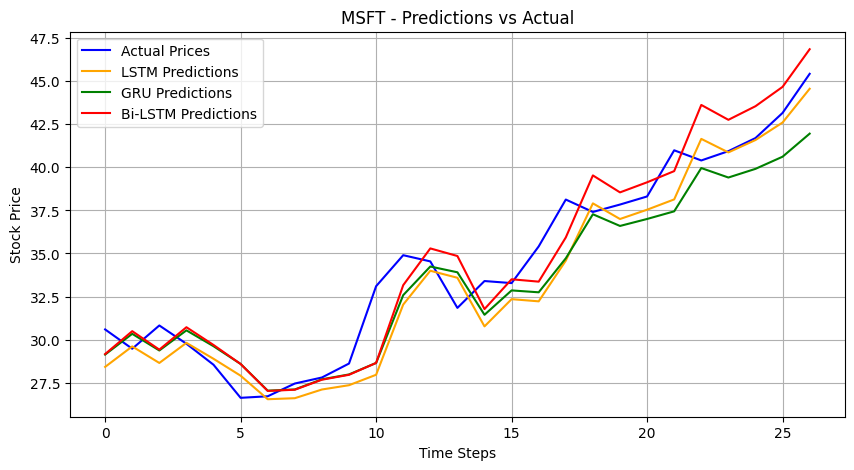


LSTM
Epoch 1/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 2/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 3/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0084
Epoch 5/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0087
Epoch 6/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 7/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 9/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 12/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 13/20
55/55 [========================

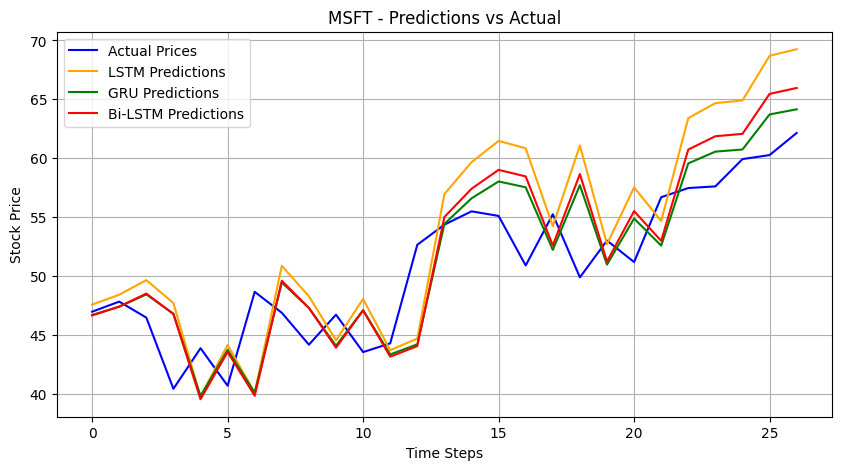


LSTM
Epoch 1/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0069
Epoch 2/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0074
Epoch 3/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0070
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 5/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0069
Epoch 6/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0075
Epoch 7/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 8/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0076
Epoch 9/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0048
Epoch 10/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 11/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 12/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0062
Epoch 13/20
83/83 [========================

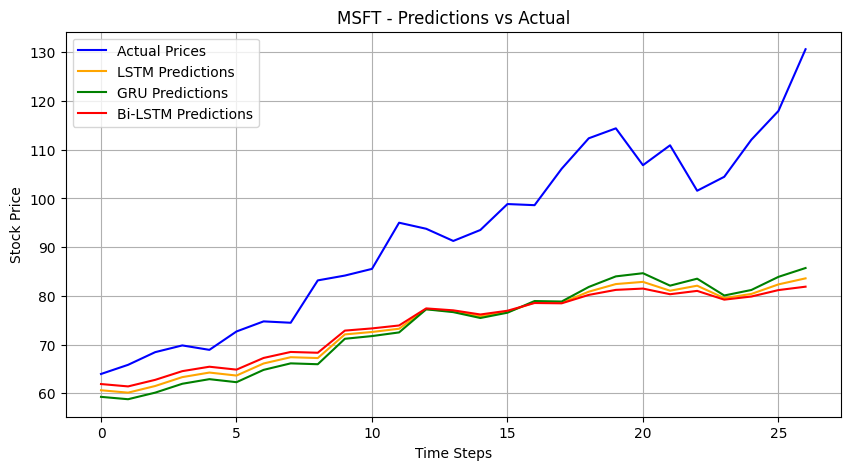


LSTM
Epoch 1/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 3/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 5/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 6/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 7/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 8/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 10/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 11/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 12/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 13/20
111/111

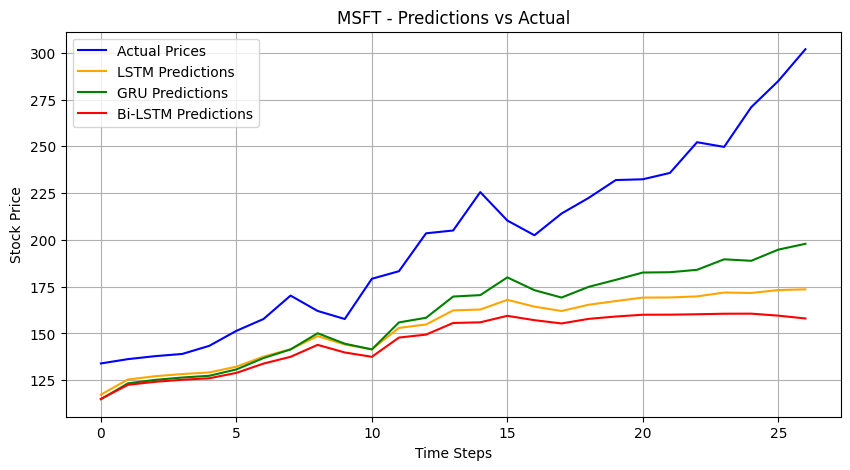


LSTM
Epoch 1/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 2/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 3/20
139/139 [==============================] - 1s 7ms/step - loss: 6.9846e-04
Epoch 4/20
139/139 [==============================] - 1s 7ms/step - loss: 9.9589e-04
Epoch 5/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 6/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 7/20
139/139 [==============================] - 1s 7ms/step - loss: 9.5547e-04
Epoch 8/20
139/139 [==============================] - 1s 8ms/step - loss: 7.9208e-04
Epoch 9/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 10/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 11/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 12/20
139/139 [==============================] - 1s 7ms/step - loss: 9.7118e-04

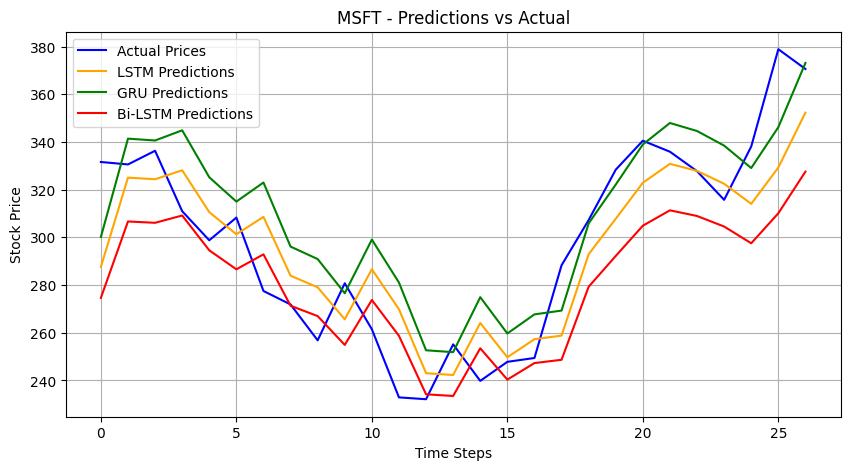

------------------------------------------------------------------
Stock: AMZN

LSTM
Epoch 1/20
27/27 [==============================] - 5s 7ms/step - loss: 0.3098
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 0.1489
Epoch 3/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0377
Epoch 4/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0381
Epoch 5/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0298
Epoch 6/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0298
Epoch 7/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0276
Epoch 8/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0178
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0243
Epoch 10/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0239
Epoch 11/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0175
Epoch 12/20
27/27 [=========================

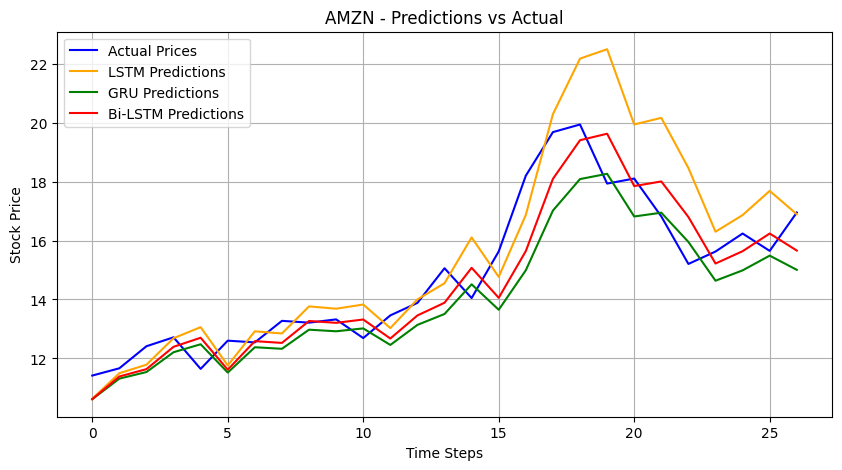


LSTM
Epoch 1/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 2/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0089
Epoch 3/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0079
Epoch 5/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 6/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0089
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 13/20
55/55 [========================

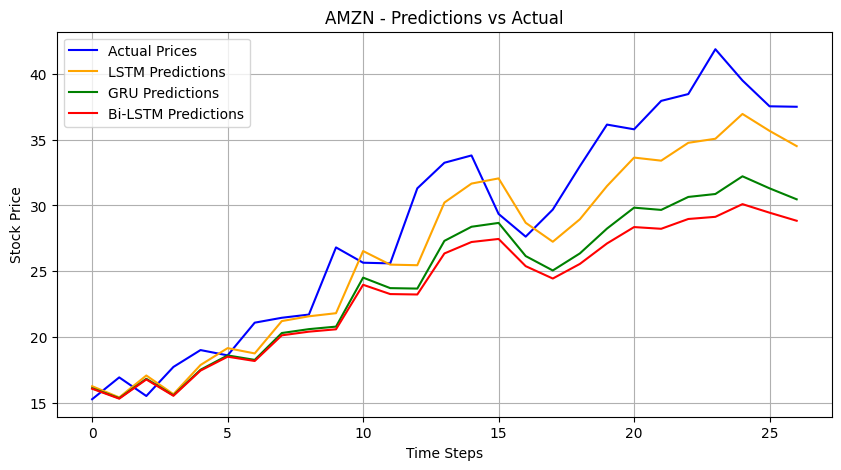


LSTM
Epoch 1/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 2/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0035
Epoch 3/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 5/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 6/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 7/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 8/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 9/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 10/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0035
Epoch 11/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 12/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 13/20
83/83 [========================

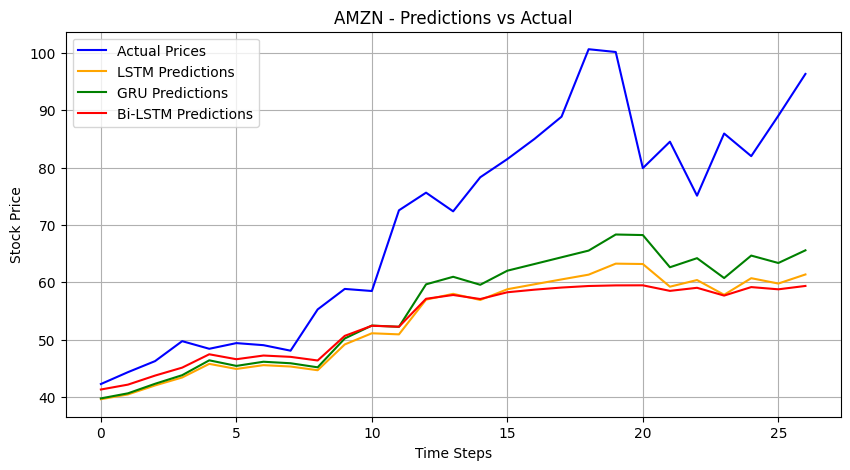


LSTM
Epoch 1/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0022
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 3/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 5/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 6/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 7/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 8/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 9/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 10/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 11/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 12/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 13/20
111/11

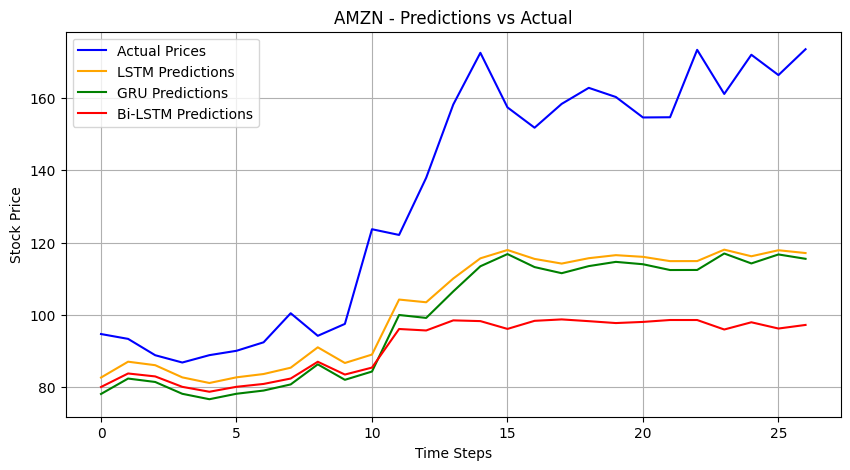


LSTM
Epoch 1/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 2/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 3/20
139/139 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 4/20
139/139 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 5/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 6/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 7/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 8/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 9/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 10/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 11/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 12/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 13/20
139/1

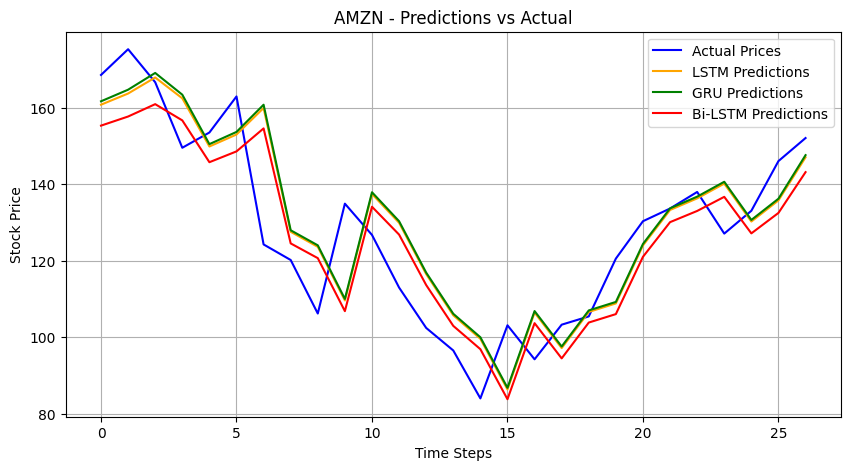

------------------------------------------------------------------
Stock: META

LSTM
Epoch 1/20
23/23 [==============================] - 5s 8ms/step - loss: 0.2414
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1659
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0995
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0560
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0482
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0429
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0372
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 10/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 11/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 12/20
23/23 [========================

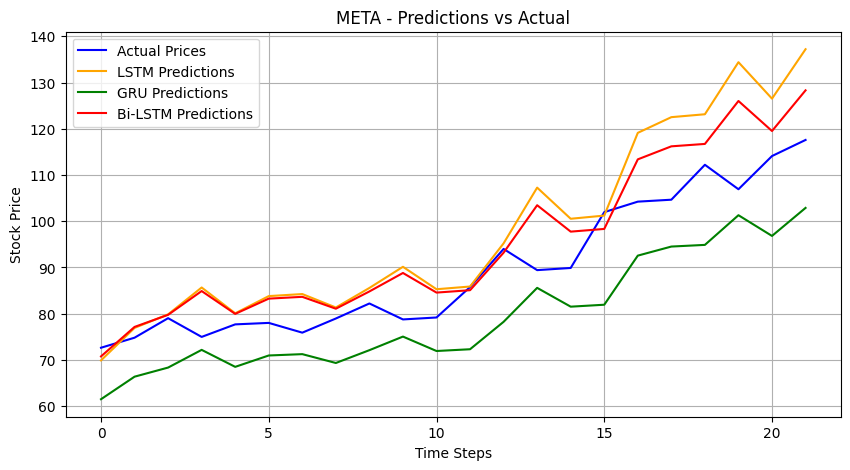


LSTM
Epoch 1/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 2/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 3/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 4/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 5/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 6/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 7/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 8/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 9/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 10/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 11/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 12/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 13/20
46/46 [========================

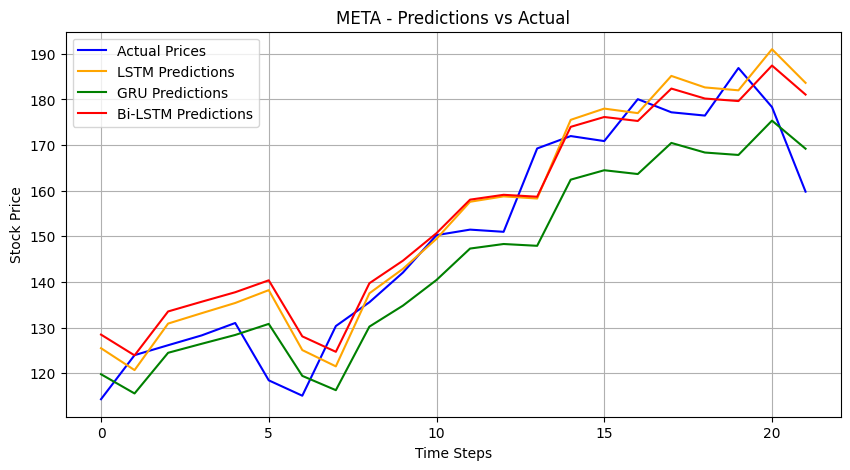


LSTM
Epoch 1/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 2/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 3/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 4/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 5/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 6/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 7/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 8/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 9/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 10/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 11/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 12/20
69/69 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 13/20
69/69 [========================

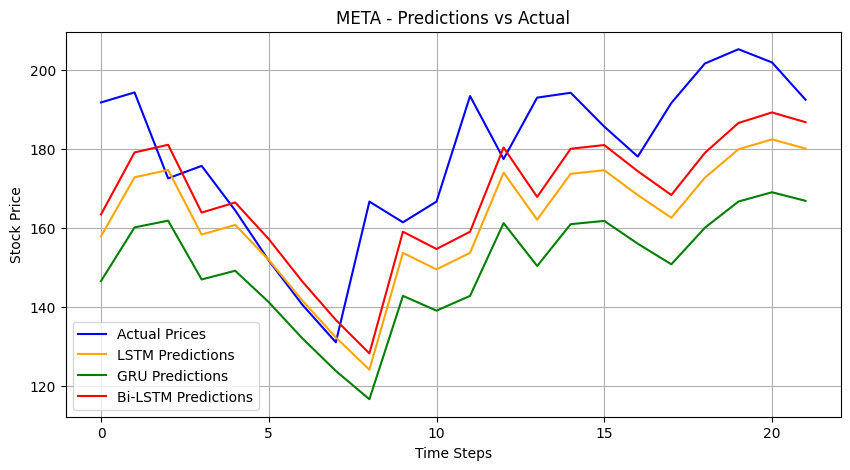


LSTM
Epoch 1/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0044
Epoch 2/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0047
Epoch 3/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 4/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0041
Epoch 5/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0038
Epoch 6/20
92/92 [==============================] - 1s 10ms/step - loss: 0.0037
Epoch 7/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 8/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0037
Epoch 9/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0047
Epoch 10/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 11/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0043
Epoch 12/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0035
Epoch 13/20
92/92 [=======================

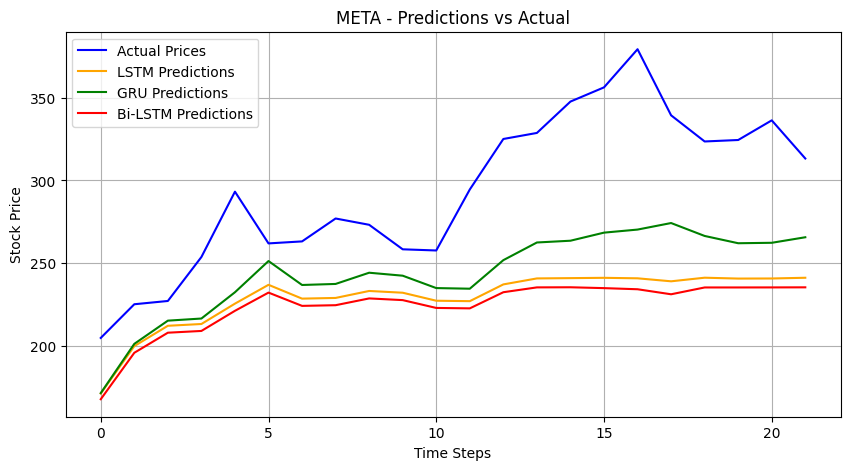


LSTM
Epoch 1/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 2/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 3/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 4/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 5/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 6/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 7/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 8/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 9/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 10/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 11/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 12/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 13/20
115/

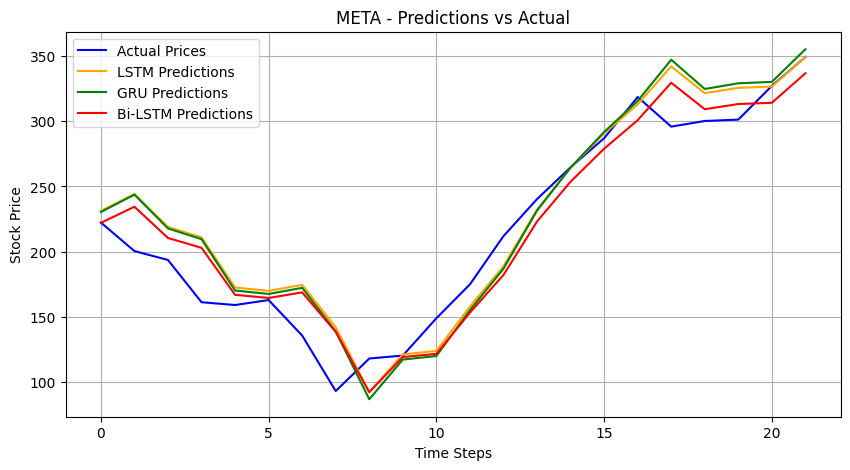

------------------------------------------------------------------
Stock: GOOGL

LSTM
Epoch 1/20
27/27 [==============================] - 5s 10ms/step - loss: 0.3343
Epoch 2/20
27/27 [==============================] - 0s 8ms/step - loss: 0.1643
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0548
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0557
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0556
Epoch 6/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0564
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 8/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0485
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0529
Epoch 10/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0533
Epoch 11/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0504
Epoch 12/20
27/27 [=======================

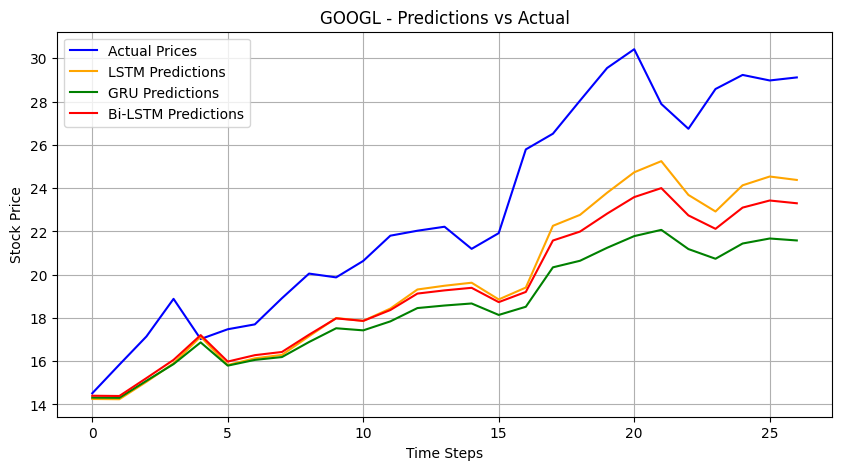


LSTM
Epoch 1/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0259
Epoch 2/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0151
Epoch 3/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 5/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 6/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 7/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 8/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 9/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0062
Epoch 10/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 11/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 12/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 13/20
55/55 [======================

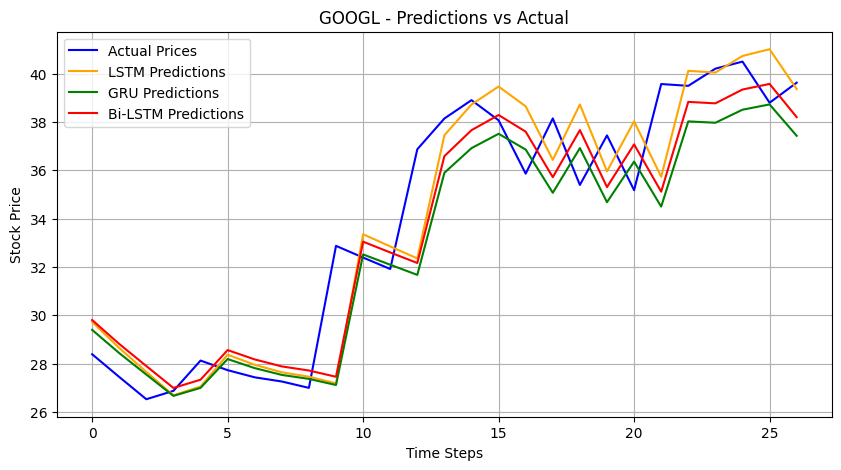


LSTM
Epoch 1/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 2/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 3/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 4/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0044
Epoch 5/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 6/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0041
Epoch 7/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0047
Epoch 8/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 9/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0029
Epoch 10/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0064
Epoch 11/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0053
Epoch 12/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0050
Epoch 13/20
83/83 [========================

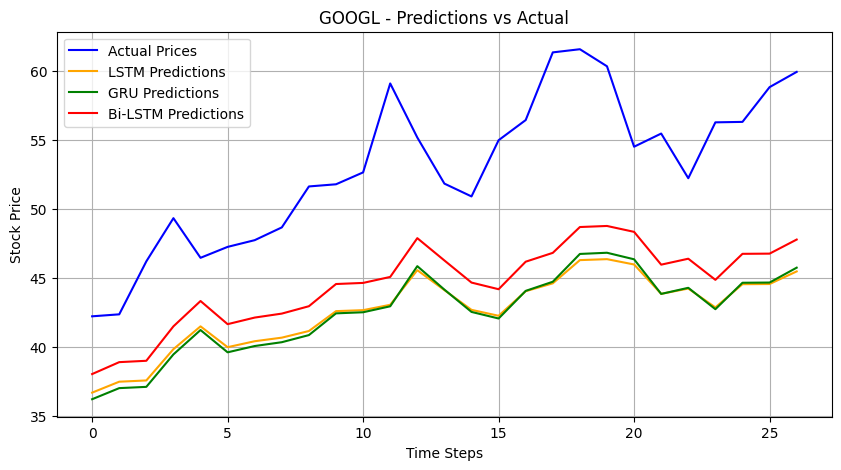


LSTM
Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0032
Epoch 2/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0031
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 5/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 6/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 7/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0022
Epoch 8/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0033
Epoch 9/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0031
Epoch 10/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 11/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 12/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 13/20
111/

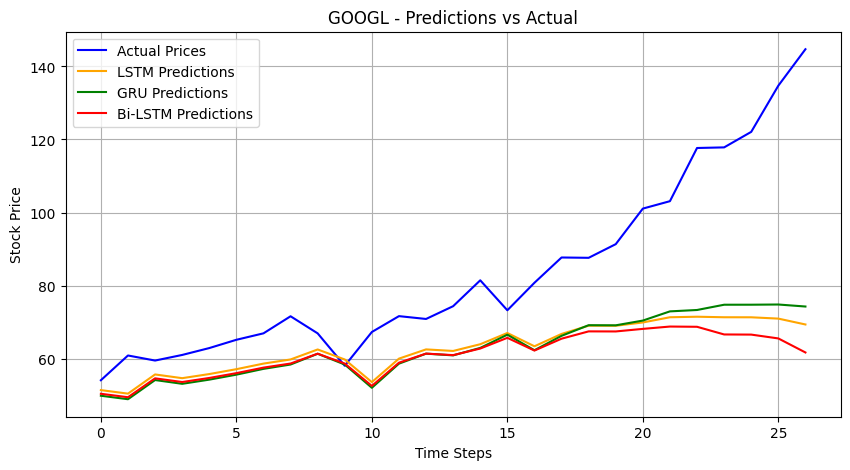


LSTM
Epoch 1/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 2/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 3/20
139/139 [==============================] - 1s 9ms/step - loss: 9.4178e-04
Epoch 4/20
139/139 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 5/20
139/139 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 6/20
139/139 [==============================] - 1s 9ms/step - loss: 8.8458e-04
Epoch 7/20
139/139 [==============================] - 1s 7ms/step - loss: 8.2989e-04
Epoch 8/20
139/139 [==============================] - 1s 8ms/step - loss: 9.6574e-04
Epoch 9/20
139/139 [==============================] - 1s 8ms/step - loss: 9.7679e-04
Epoch 10/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 11/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 12/20
139/139 [==============================] - 1s 8ms/step - loss: 9.45

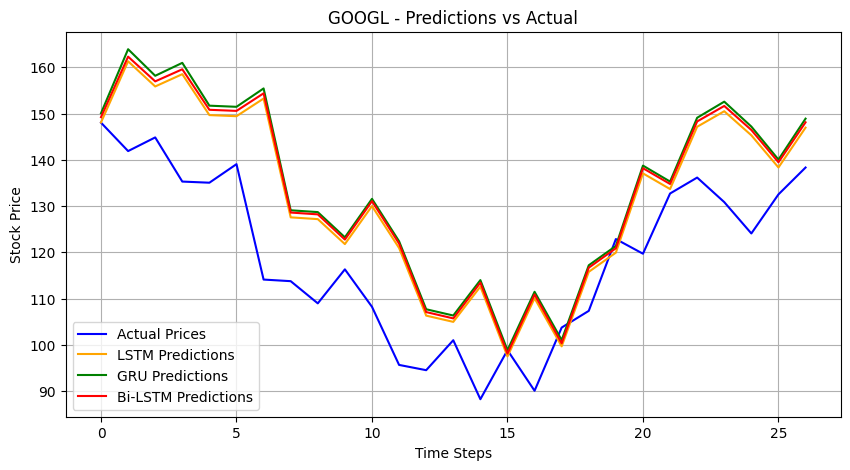

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Number of splits for time series cross-validation
cv_n_splits = 5

# Create TimeSeriesSplit object
tss = TimeSeriesSplit(n_splits=cv_n_splits)

# Define more complex models outside the loop
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_gru_model():
    model = Sequential()
    model.add(GRU(100, input_shape=(1, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_bi_lstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(100, input_shape=(1, 1), return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Metrics for evaluation
evaluation_metrics = {'LSTM': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'GRU': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'Bi-LSTM': {'MAE': [], 'MSE': [], 'MAPE': []}}


# Iterate over each stock's data and perform time series cross-validation
for symbol, stock_data in filtered_historical_data.items():

    print('------------------------------------------------------------------')
    print(f"Stock: {symbol}")
    # Create models
    lstm_model = create_lstm_model()
    gru_model = create_gru_model()
    bi_lstm_model = create_bi_lstm_model()

    for train_index, test_index in tss.split(stock_data):
        train_data, test_data = stock_data.iloc[train_index], stock_data.iloc[test_index]

        # Extract 'Close' prices
        train_close_prices = train_data['Close'].values.reshape(-1, 1)
        test_close_prices = test_data['Close'].values.reshape(-1, 1)

        # Normalize 'Close' prices using MinMaxScaler fitted on the training data
        scaler = MinMaxScaler()
        train_close_prices_normalized = scaler.fit_transform(train_close_prices)
        test_close_prices_normalized = scaler.transform(test_close_prices)

        # Prepare feature and target data for training
        X_train = train_close_prices_normalized[:-1]
        y_train = train_close_prices_normalized[1:]

        # Reshape data for LSTM and GRU input shape (samples, time steps, features)
        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

        # Train models
        print('\nLSTM')
        lstm_model.fit(X_train, y_train, epochs=20, batch_size=1)
        print('\nGRU')
        gru_model.fit(X_train, y_train, epochs=20, batch_size=1)
        print('\nBi-LSTM')
        bi_lstm_model.fit(X_train, y_train, epochs=20, batch_size=1)

        # Prepare test data for predictions
        X_test = test_close_prices_normalized[:-1]
        y_test = test_close_prices_normalized[1:]
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

        # Make predictions
        lstm_predictions = lstm_model.predict(X_test)
        gru_predictions = gru_model.predict(X_test)
        bi_lstm_predictions = bi_lstm_model.predict(X_test)

        # Reverse the normalization to get actual prices
        lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)
        gru_predictions_actual = scaler.inverse_transform(gru_predictions)
        bi_lstm_predictions_actual = scaler.inverse_transform(bi_lstm_predictions)
        y_test_actual = scaler.inverse_transform(y_test)

        # Evaluate models
        lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions_actual)
        lstm_mse = mean_squared_error(y_test_actual, lstm_predictions_actual)
        lstm_mape = np.mean(np.abs((y_test_actual - lstm_predictions_actual) / y_test_actual)) * 100

        gru_mae = mean_absolute_error(y_test_actual, gru_predictions_actual)
        gru_mse = mean_squared_error(y_test_actual, gru_predictions_actual)
        gru_mape = np.mean(np.abs((y_test_actual - gru_predictions_actual) / y_test_actual)) * 100

        bi_lstm_mae = mean_absolute_error(y_test_actual, bi_lstm_predictions_actual)
        bi_lstm_mse = mean_squared_error(y_test_actual, bi_lstm_predictions_actual)
        bi_lstm_mape = np.mean(np.abs((y_test_actual - bi_lstm_predictions_actual) / y_test_actual)) * 100

        print(f"LSTM - MAE: {lstm_mae}, MSE: {lstm_mse}, MAPE: {lstm_mape}%")
        print(f"GRU - MAE: {gru_mae}, MSE: {gru_mse}, MAPE: {gru_mape}%")
        print(f"Bi-LSTM - MAE: {bi_lstm_mae}, MSE: {bi_lstm_mse}, MAPE: {bi_lstm_mape}%")

        # Record metrics for comparison
        evaluation_metrics['LSTM']['MAE'].append(lstm_mae)
        evaluation_metrics['LSTM']['MSE'].append(lstm_mse)
        evaluation_metrics['LSTM']['MAPE'].append(lstm_mape)

        evaluation_metrics['GRU']['MAE'].append(gru_mae)
        evaluation_metrics['GRU']['MSE'].append(gru_mse)
        evaluation_metrics['GRU']['MAPE'].append(gru_mape)

        evaluation_metrics['Bi-LSTM']['MAE'].append(bi_lstm_mae)
        evaluation_metrics['Bi-LSTM']['MSE'].append(bi_lstm_mse)
        evaluation_metrics['Bi-LSTM']['MAPE'].append(bi_lstm_mape)

        print(f"LSTM Mean Squared Error: {lstm_mse}")
        print(f"GRU Mean Squared Error: {gru_mse}")
        print(f"Bi-LSTM Mean Squared Error: {bi_lstm_mse}")

        # Plot predictions vs actual for each model
        plt.figure(figsize=(10, 5))
        plt.plot(y_test_actual, label='Actual Prices', color='blue')
        plt.plot(lstm_predictions_actual, label='LSTM Predictions', color='orange')
        plt.plot(gru_predictions_actual, label='GRU Predictions', color='green')
        plt.plot(bi_lstm_predictions_actual, label='Bi-LSTM Predictions', color='red')
        plt.title(f'{symbol} - Predictions vs Actual')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.grid('both')
        plt.legend()
        plt.show()


In [ ]:
# Compare models based on metrics
for model_name, metrics in evaluation_metrics.items():
    avg_mae = np.mean(metrics['MAE'])
    avg_mse = np.mean(metrics['MSE'])
    avg_mape = np.mean(metrics['MAPE'])

    print(f"\n{model_name} Model Average Metrics:")
    print(f"Average MAE: {avg_mae}")
    print(f"Average MSE: {avg_mse}")
    print(f"Average MAPE: {avg_mape}%")


LSTM Model Average Metrics:
Average MAE: 14.654367991874517
Average MSE: 603.1073667874792
Average MAPE: 12.391226009591433%

GRU Model Average Metrics:
Average MAE: 14.879715272408944
Average MSE: 558.8741667678884
Average MAPE: 12.624631959053625%

Bi-LSTM Model Average Metrics:
Average MAE: 16.501808666781542
Average MSE: 788.2102040365172
Average MAPE: 13.544325554131605%


## without normalize

------------------------------------------------------------------
Stock: AAPL

LSTM
Epoch 1/20
27/27 [==============================] - 7s 9ms/step - loss: 166.9598
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 126.8272
Epoch 3/20
27/27 [==============================] - 0s 6ms/step - loss: 54.7221
Epoch 4/20
27/27 [==============================] - 0s 6ms/step - loss: 28.7925
Epoch 5/20
27/27 [==============================] - 0s 6ms/step - loss: 20.5575
Epoch 6/20
27/27 [==============================] - 0s 6ms/step - loss: 16.6211
Epoch 7/20
27/27 [==============================] - 0s 6ms/step - loss: 14.6818
Epoch 8/20
27/27 [==============================] - 0s 6ms/step - loss: 13.2610
Epoch 9/20
27/27 [==============================] - 0s 6ms/step - loss: 12.9617
Epoch 10/20
27/27 [==============================] - 0s 6ms/step - loss: 12.7324
Epoch 11/20
27/27 [==============================] - 0s 6ms/step - loss: 12.4722
Epoch 12/20
27/27 [============

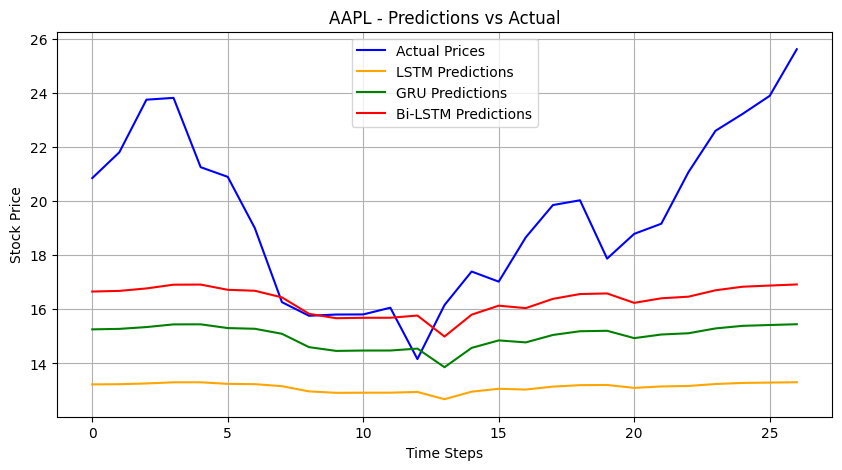


LSTM
Epoch 1/20
55/55 [==============================] - 0s 8ms/step - loss: 24.4681
Epoch 2/20
55/55 [==============================] - 0s 6ms/step - loss: 16.5178
Epoch 3/20
55/55 [==============================] - 0s 6ms/step - loss: 12.1529
Epoch 4/20
55/55 [==============================] - 0s 6ms/step - loss: 9.6088
Epoch 5/20
55/55 [==============================] - 0s 6ms/step - loss: 8.2797
Epoch 6/20
55/55 [==============================] - 0s 6ms/step - loss: 7.1819
Epoch 7/20
55/55 [==============================] - 0s 6ms/step - loss: 6.4384
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 6.6058
Epoch 9/20
55/55 [==============================] - 0s 8ms/step - loss: 5.1906
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 5.5386
Epoch 11/20
55/55 [==============================] - 0s 6ms/step - loss: 5.6102
Epoch 12/20
55/55 [==============================] - 0s 6ms/step - loss: 3.9489
Epoch 13/20
55/55 [=====================

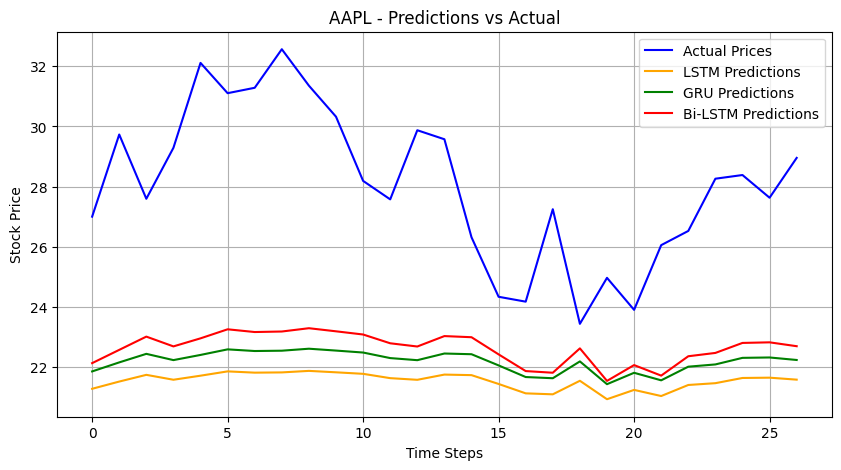


LSTM
Epoch 1/20
83/83 [==============================] - 1s 7ms/step - loss: 14.2752
Epoch 2/20
83/83 [==============================] - 1s 6ms/step - loss: 10.6948
Epoch 3/20
83/83 [==============================] - 1s 6ms/step - loss: 8.8356
Epoch 4/20
83/83 [==============================] - 1s 8ms/step - loss: 7.1573
Epoch 5/20
83/83 [==============================] - 1s 7ms/step - loss: 6.7908
Epoch 6/20
83/83 [==============================] - 1s 6ms/step - loss: 5.5538
Epoch 7/20
83/83 [==============================] - 1s 8ms/step - loss: 5.4335
Epoch 8/20
83/83 [==============================] - 1s 11ms/step - loss: 5.7937
Epoch 9/20
83/83 [==============================] - 1s 11ms/step - loss: 4.1205
Epoch 10/20
83/83 [==============================] - 1s 9ms/step - loss: 5.4973
Epoch 11/20
83/83 [==============================] - 1s 9ms/step - loss: 5.3991
Epoch 12/20
83/83 [==============================] - 1s 8ms/step - loss: 5.1022
Epoch 13/20
83/83 [====================

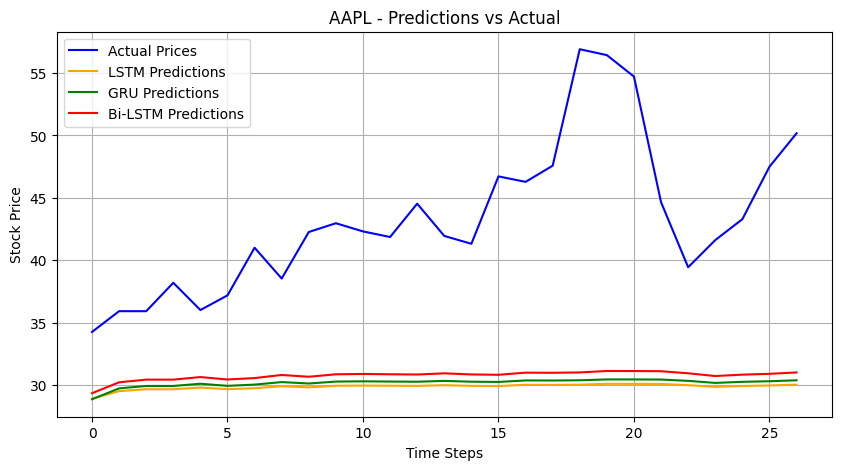


LSTM
Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 45.6651
Epoch 2/20
111/111 [==============================] - 1s 8ms/step - loss: 32.9673
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: 26.8609
Epoch 4/20
111/111 [==============================] - 1s 8ms/step - loss: 22.0073
Epoch 5/20
111/111 [==============================] - 1s 8ms/step - loss: 23.2727
Epoch 6/20
111/111 [==============================] - 1s 7ms/step - loss: 18.8441
Epoch 7/20
111/111 [==============================] - 1s 9ms/step - loss: 17.9711
Epoch 8/20
111/111 [==============================] - 1s 10ms/step - loss: 14.3419
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 13.6093
Epoch 10/20
111/111 [==============================] - 1s 9ms/step - loss: 13.5545
Epoch 11/20
111/111 [==============================] - 1s 7ms/step - loss: 14.7209
Epoch 12/20
111/111 [==============================] - 1s 6ms/step - loss: 12.0647
Epoch 

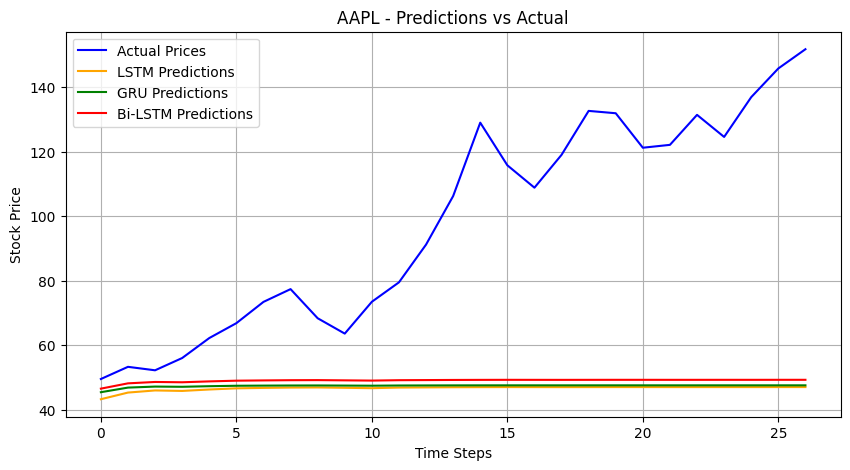


LSTM
Epoch 1/20
139/139 [==============================] - 1s 6ms/step - loss: 651.9377
Epoch 2/20
139/139 [==============================] - 1s 7ms/step - loss: 564.8354
Epoch 3/20
139/139 [==============================] - 1s 6ms/step - loss: 515.0048
Epoch 4/20
139/139 [==============================] - 1s 8ms/step - loss: 471.9664
Epoch 5/20
139/139 [==============================] - 1s 6ms/step - loss: 449.2205
Epoch 6/20
139/139 [==============================] - 1s 8ms/step - loss: 406.7730
Epoch 7/20
139/139 [==============================] - 1s 9ms/step - loss: 392.6397
Epoch 8/20
139/139 [==============================] - 2s 11ms/step - loss: 366.7004
Epoch 9/20
139/139 [==============================] - 1s 9ms/step - loss: 340.0456
Epoch 10/20
139/139 [==============================] - 1s 7ms/step - loss: 323.7475
Epoch 11/20
139/139 [==============================] - 1s 6ms/step - loss: 312.6309
Epoch 12/20
139/139 [==============================] - 1s 6ms/step - loss: 286

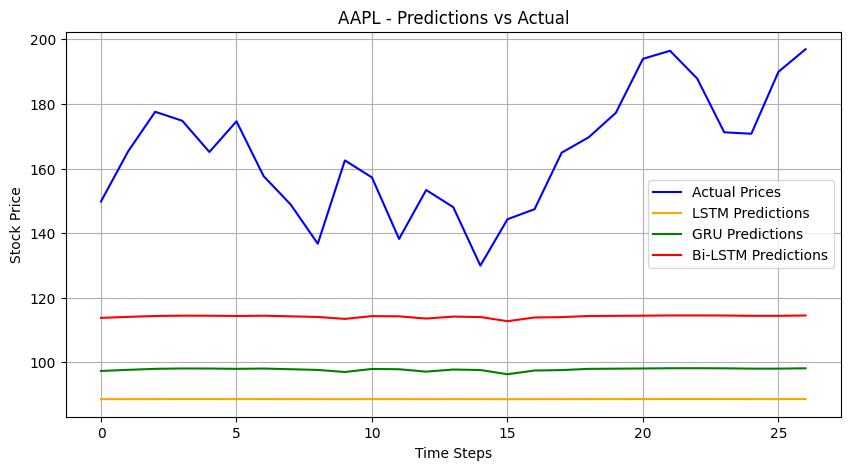

------------------------------------------------------------------
Stock: MSFT

LSTM
Epoch 1/20
27/27 [==============================] - 5s 6ms/step - loss: 721.9265
Epoch 2/20
27/27 [==============================] - 0s 6ms/step - loss: 597.6461
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 380.3571
Epoch 4/20
27/27 [==============================] - 0s 11ms/step - loss: 275.5822
Epoch 5/20
27/27 [==============================] - 0s 9ms/step - loss: 224.2479
Epoch 6/20
27/27 [==============================] - 0s 10ms/step - loss: 186.9165
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 157.2511
Epoch 8/20
27/27 [==============================] - 0s 10ms/step - loss: 132.3317
Epoch 9/20
27/27 [==============================] - 0s 9ms/step - loss: 111.2862
Epoch 10/20
27/27 [==============================] - 0s 9ms/step - loss: 93.7216
Epoch 11/20
27/27 [==============================] - 0s 9ms/step - loss: 79.2807
Epoch 12/20
27/27 [==

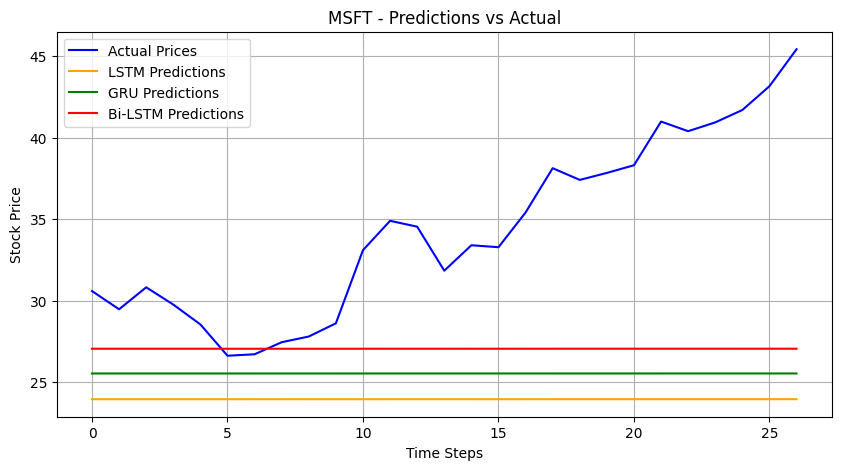


LSTM
Epoch 1/20
55/55 [==============================] - 0s 9ms/step - loss: 67.6598
Epoch 2/20
55/55 [==============================] - 0s 9ms/step - loss: 53.5844
Epoch 3/20
55/55 [==============================] - 0s 6ms/step - loss: 43.9425
Epoch 4/20
55/55 [==============================] - 0s 6ms/step - loss: 38.6250
Epoch 5/20
55/55 [==============================] - 0s 6ms/step - loss: 35.2360
Epoch 6/20
55/55 [==============================] - 0s 6ms/step - loss: 33.2471
Epoch 7/20
55/55 [==============================] - 0s 6ms/step - loss: 32.0247
Epoch 8/20
55/55 [==============================] - 0s 5ms/step - loss: 31.2940
Epoch 9/20
55/55 [==============================] - 0s 6ms/step - loss: 30.9012
Epoch 10/20
55/55 [==============================] - 0s 6ms/step - loss: 30.7566
Epoch 11/20
55/55 [==============================] - 0s 6ms/step - loss: 30.5161
Epoch 12/20
55/55 [==============================] - 0s 6ms/step - loss: 30.5499
Epoch 13/20
55/55 [============

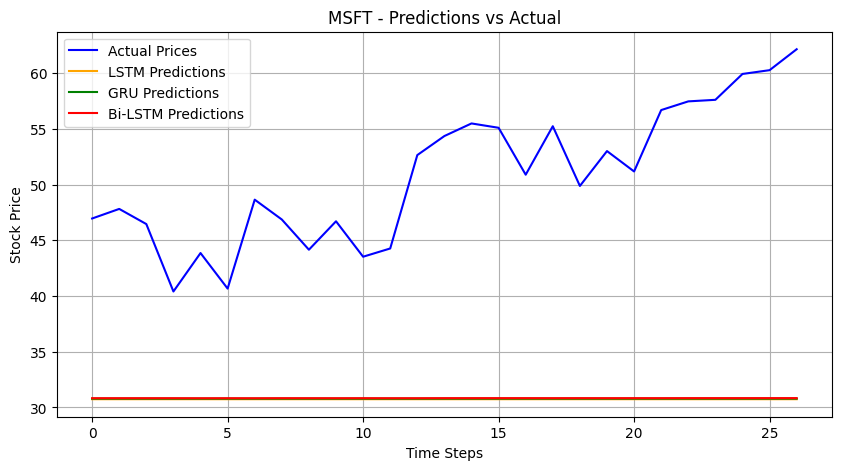


LSTM
Epoch 1/20
83/83 [==============================] - 1s 8ms/step - loss: 154.0413
Epoch 2/20
83/83 [==============================] - 1s 7ms/step - loss: 134.3311
Epoch 3/20
83/83 [==============================] - 1s 8ms/step - loss: 126.9482
Epoch 4/20
83/83 [==============================] - 1s 9ms/step - loss: 124.7678
Epoch 5/20
83/83 [==============================] - 1s 9ms/step - loss: 123.2927
Epoch 6/20
83/83 [==============================] - 1s 9ms/step - loss: 122.5205
Epoch 7/20
83/83 [==============================] - 1s 12ms/step - loss: 122.1669
Epoch 8/20
83/83 [==============================] - 1s 11ms/step - loss: 121.8126
Epoch 9/20
83/83 [==============================] - 0s 6ms/step - loss: 122.1410
Epoch 10/20
83/83 [==============================] - 0s 6ms/step - loss: 121.8919
Epoch 11/20
83/83 [==============================] - 1s 6ms/step - loss: 121.8913
Epoch 12/20
83/83 [==============================] - 0s 6ms/step - loss: 121.8228
Epoch 13/20
83/83

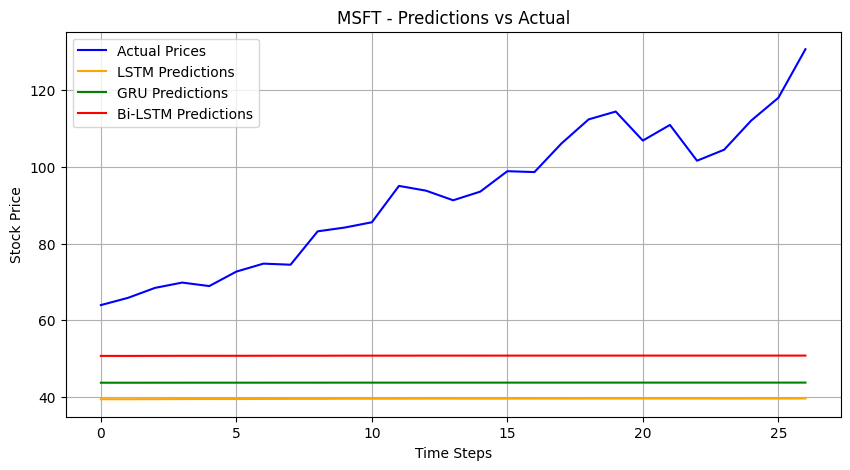


LSTM
Epoch 1/20
111/111 [==============================] - 1s 6ms/step - loss: 753.9142
Epoch 2/20
111/111 [==============================] - 1s 6ms/step - loss: 643.7004
Epoch 3/20
111/111 [==============================] - 1s 6ms/step - loss: 555.4139
Epoch 4/20
111/111 [==============================] - 1s 6ms/step - loss: 495.4720
Epoch 5/20
111/111 [==============================] - 1s 6ms/step - loss: 461.1667
Epoch 6/20
111/111 [==============================] - 1s 6ms/step - loss: 408.5793
Epoch 7/20
111/111 [==============================] - 1s 7ms/step - loss: 373.4570
Epoch 8/20
111/111 [==============================] - 1s 8ms/step - loss: 345.5825
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 317.1254
Epoch 10/20
111/111 [==============================] - 1s 9ms/step - loss: 293.6800
Epoch 11/20
111/111 [==============================] - 1s 10ms/step - loss: 284.1014
Epoch 12/20
111/111 [==============================] - 1s 9ms/step - loss: 262

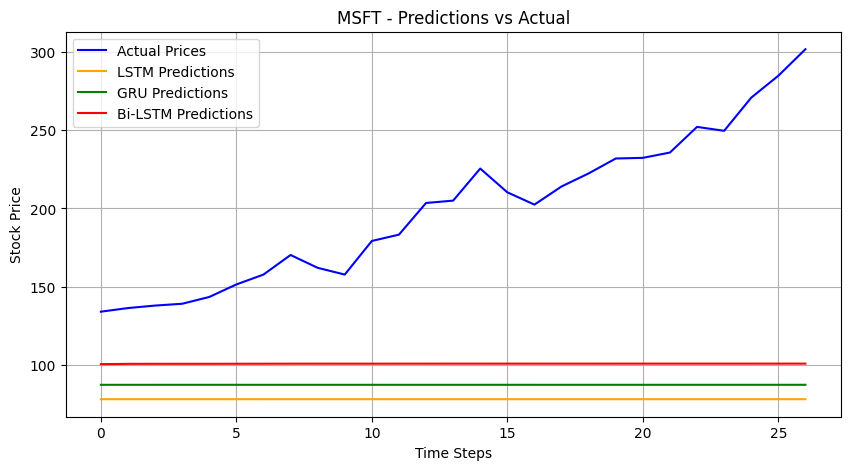


LSTM
Epoch 1/20
139/139 [==============================] - 1s 7ms/step - loss: 3297.1414
Epoch 2/20
139/139 [==============================] - 1s 8ms/step - loss: 3005.3044
Epoch 3/20
139/139 [==============================] - 1s 9ms/step - loss: 2817.0889
Epoch 4/20
139/139 [==============================] - 1s 9ms/step - loss: 2660.0667
Epoch 5/20
139/139 [==============================] - 1s 9ms/step - loss: 2530.5735
Epoch 6/20
139/139 [==============================] - 1s 7ms/step - loss: 2411.9102
Epoch 7/20
139/139 [==============================] - 1s 6ms/step - loss: 2312.4949
Epoch 8/20
139/139 [==============================] - 1s 6ms/step - loss: 2276.4294
Epoch 9/20
139/139 [==============================] - 1s 6ms/step - loss: 2139.6064
Epoch 10/20
139/139 [==============================] - 1s 7ms/step - loss: 2059.2932
Epoch 11/20
139/139 [==============================] - 1s 6ms/step - loss: 1965.3387
Epoch 12/20
139/139 [==============================] - 1s 6ms/step -

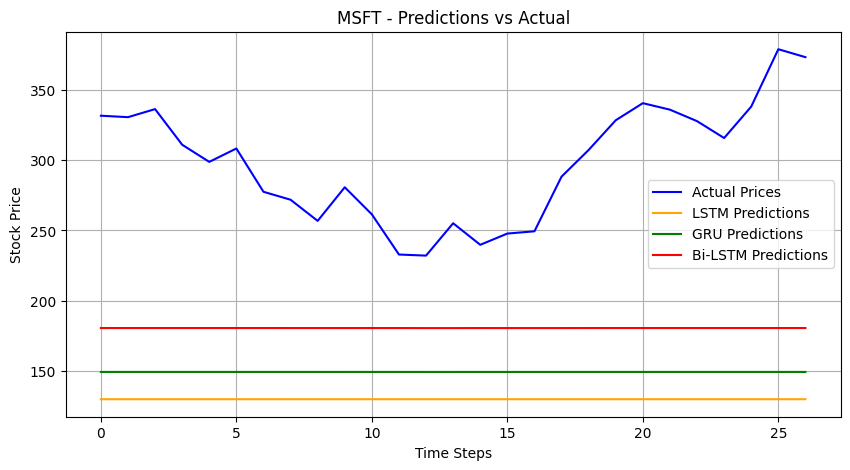

------------------------------------------------------------------
Stock: AMZN

LSTM
Epoch 1/20
27/27 [==============================] - 6s 6ms/step - loss: 76.2785
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 52.1731
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 8.6248
Epoch 4/20
27/27 [==============================] - 0s 7ms/step - loss: 2.5269
Epoch 5/20
27/27 [==============================] - 0s 7ms/step - loss: 2.3750
Epoch 6/20
27/27 [==============================] - 0s 7ms/step - loss: 2.4879
Epoch 7/20
27/27 [==============================] - 0s 7ms/step - loss: 2.3921
Epoch 8/20
27/27 [==============================] - 0s 7ms/step - loss: 1.9884
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 2.2490
Epoch 10/20
27/27 [==============================] - 0s 7ms/step - loss: 1.9018
Epoch 11/20
27/27 [==============================] - 0s 7ms/step - loss: 1.8808
Epoch 12/20
27/27 [=======================

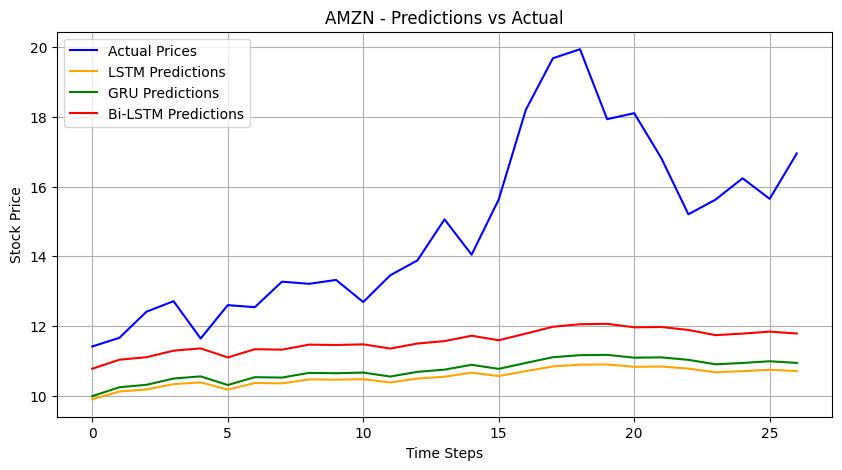


LSTM
Epoch 1/20
55/55 [==============================] - 0s 6ms/step - loss: 9.2013
Epoch 2/20
55/55 [==============================] - 0s 7ms/step - loss: 5.7486
Epoch 3/20
55/55 [==============================] - 0s 6ms/step - loss: 5.3410
Epoch 4/20
55/55 [==============================] - 0s 6ms/step - loss: 4.3327
Epoch 5/20
55/55 [==============================] - 0s 6ms/step - loss: 3.6184
Epoch 6/20
55/55 [==============================] - 0s 6ms/step - loss: 3.3013
Epoch 7/20
55/55 [==============================] - 0s 6ms/step - loss: 2.7125
Epoch 8/20
55/55 [==============================] - 0s 6ms/step - loss: 2.5178
Epoch 9/20
55/55 [==============================] - 0s 6ms/step - loss: 2.1548
Epoch 10/20
55/55 [==============================] - 0s 6ms/step - loss: 2.8879
Epoch 11/20
55/55 [==============================] - 0s 6ms/step - loss: 2.2632
Epoch 12/20
55/55 [==============================] - 0s 6ms/step - loss: 2.1939
Epoch 13/20
55/55 [========================

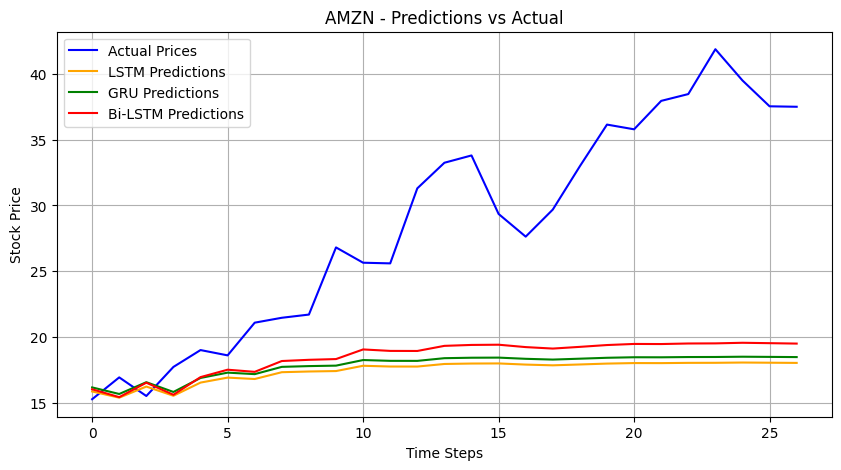


LSTM
Epoch 1/20
83/83 [==============================] - 1s 8ms/step - loss: 47.8979
Epoch 2/20
83/83 [==============================] - 1s 9ms/step - loss: 31.0664
Epoch 3/20
83/83 [==============================] - 1s 7ms/step - loss: 24.8998
Epoch 4/20
83/83 [==============================] - 0s 6ms/step - loss: 18.7328
Epoch 5/20
83/83 [==============================] - 1s 6ms/step - loss: 15.6578
Epoch 6/20
83/83 [==============================] - 1s 6ms/step - loss: 12.9422
Epoch 7/20
83/83 [==============================] - 1s 6ms/step - loss: 11.3094
Epoch 8/20
83/83 [==============================] - 0s 6ms/step - loss: 10.2178
Epoch 9/20
83/83 [==============================] - 1s 6ms/step - loss: 9.6724
Epoch 10/20
83/83 [==============================] - 1s 6ms/step - loss: 7.7486
Epoch 11/20
83/83 [==============================] - 1s 6ms/step - loss: 7.7224
Epoch 12/20
83/83 [==============================] - 1s 7ms/step - loss: 7.9079
Epoch 13/20
83/83 [================

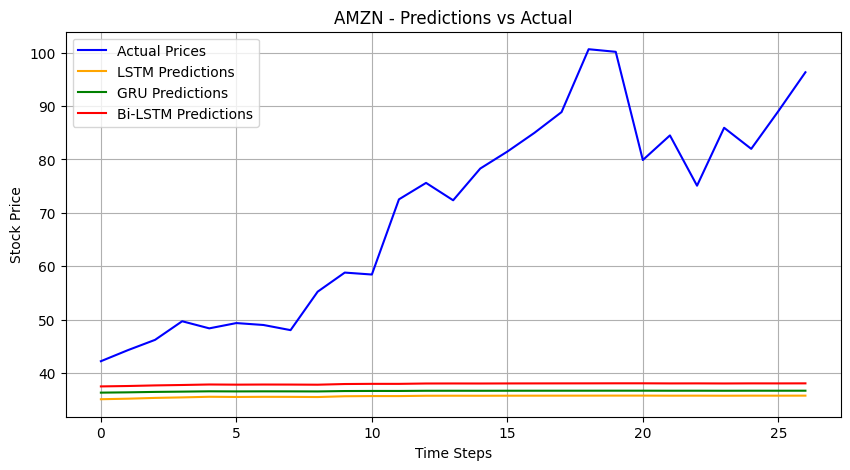


LSTM
Epoch 1/20
111/111 [==============================] - 1s 6ms/step - loss: 325.6220
Epoch 2/20
111/111 [==============================] - 1s 6ms/step - loss: 267.1016
Epoch 3/20
111/111 [==============================] - 1s 6ms/step - loss: 230.4369
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 198.4379
Epoch 5/20
111/111 [==============================] - 1s 9ms/step - loss: 180.5022
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 162.4148
Epoch 7/20
111/111 [==============================] - 1s 9ms/step - loss: 149.7124
Epoch 8/20
111/111 [==============================] - 1s 8ms/step - loss: 136.9676
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 124.1786
Epoch 10/20
111/111 [==============================] - 1s 7ms/step - loss: 110.3209
Epoch 11/20
111/111 [==============================] - 1s 6ms/step - loss: 102.5055
Epoch 12/20
111/111 [==============================] - 1s 6ms/step - loss: 95.6

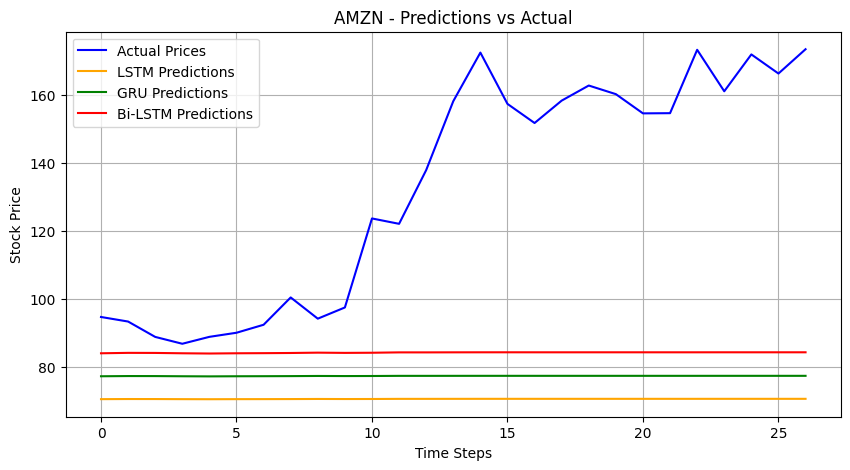


LSTM
Epoch 1/20
139/139 [==============================] - 1s 6ms/step - loss: 935.1660
Epoch 2/20
139/139 [==============================] - 1s 6ms/step - loss: 827.5031
Epoch 3/20
139/139 [==============================] - 1s 6ms/step - loss: 735.7237
Epoch 4/20
139/139 [==============================] - 1s 7ms/step - loss: 744.0417
Epoch 5/20
139/139 [==============================] - 1s 6ms/step - loss: 651.9320
Epoch 6/20
139/139 [==============================] - 1s 7ms/step - loss: 603.9258
Epoch 7/20
139/139 [==============================] - 1s 7ms/step - loss: 568.4421
Epoch 8/20
139/139 [==============================] - 1s 10ms/step - loss: 533.8782
Epoch 9/20
139/139 [==============================] - 1s 10ms/step - loss: 514.0430
Epoch 10/20
139/139 [==============================] - 1s 10ms/step - loss: 497.6880
Epoch 11/20
139/139 [==============================] - 1s 9ms/step - loss: 494.8422
Epoch 12/20
139/139 [==============================] - 1s 6ms/step - loss: 4

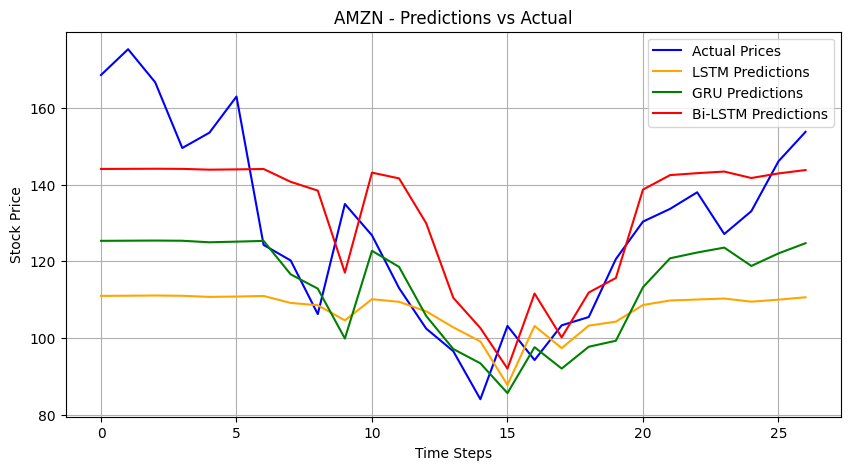

------------------------------------------------------------------
Stock: META

LSTM
Epoch 1/20
23/23 [==============================] - 5s 8ms/step - loss: 1756.6173
Epoch 2/20
23/23 [==============================] - 0s 10ms/step - loss: 1681.1974
Epoch 3/20
23/23 [==============================] - 0s 10ms/step - loss: 1452.4600
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 1219.5975
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 1107.0891
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 1035.4064
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 969.3909
Epoch 8/20
23/23 [==============================] - 0s 8ms/step - loss: 921.3544
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 873.2347
Epoch 10/20
23/23 [==============================] - 0s 8ms/step - loss: 832.0145
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - loss: 791.4431
Epoch 12/20


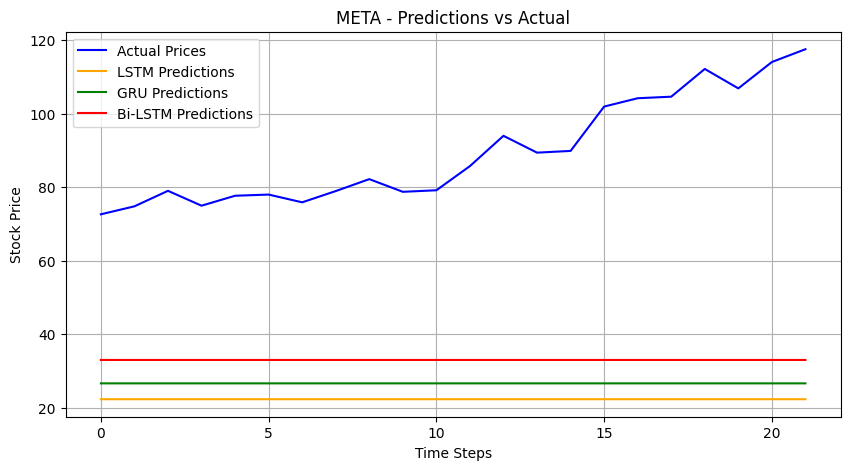


LSTM
Epoch 1/20
46/46 [==============================] - 0s 7ms/step - loss: 2495.3494
Epoch 2/20
46/46 [==============================] - 1s 12ms/step - loss: 2310.4565
Epoch 3/20
46/46 [==============================] - 0s 11ms/step - loss: 2153.8440
Epoch 4/20
46/46 [==============================] - 0s 9ms/step - loss: 2021.1289
Epoch 5/20
46/46 [==============================] - 0s 9ms/step - loss: 1907.1879
Epoch 6/20
46/46 [==============================] - 0s 10ms/step - loss: 1805.3198
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 1716.8594
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 1635.1982
Epoch 9/20
46/46 [==============================] - 0s 9ms/step - loss: 1564.6985
Epoch 10/20
46/46 [==============================] - 0s 9ms/step - loss: 1499.5205
Epoch 11/20
46/46 [==============================] - 0s 9ms/step - loss: 1439.4752
Epoch 12/20
46/46 [==============================] - 0s 10ms/step - loss: 1386.5754
Epo

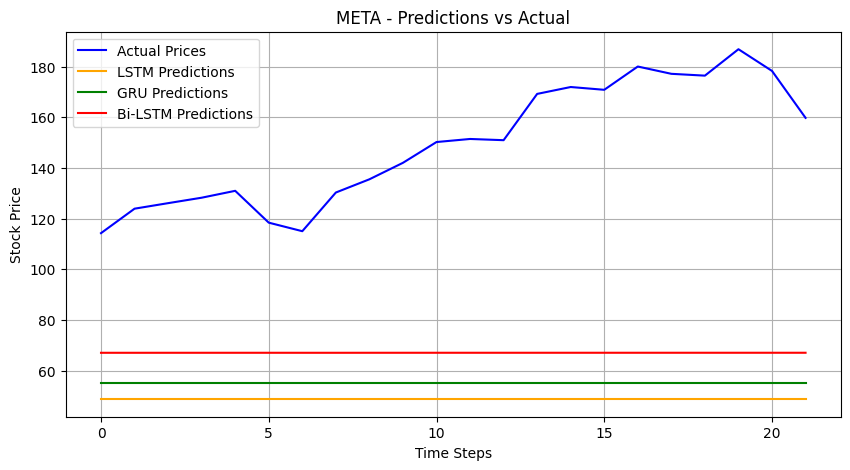


LSTM
Epoch 1/20
69/69 [==============================] - 0s 6ms/step - loss: 4105.9346
Epoch 2/20
69/69 [==============================] - 0s 7ms/step - loss: 3884.7622
Epoch 3/20
69/69 [==============================] - 0s 6ms/step - loss: 3696.4148
Epoch 4/20
69/69 [==============================] - 0s 7ms/step - loss: 3544.3223
Epoch 5/20
69/69 [==============================] - 0s 7ms/step - loss: 3404.7107
Epoch 6/20
69/69 [==============================] - 0s 6ms/step - loss: 3288.5403
Epoch 7/20
69/69 [==============================] - 0s 7ms/step - loss: 3186.2942
Epoch 8/20
69/69 [==============================] - 0s 6ms/step - loss: 3097.0571
Epoch 9/20
69/69 [==============================] - 0s 7ms/step - loss: 3018.8848
Epoch 10/20
69/69 [==============================] - 0s 6ms/step - loss: 2947.2612
Epoch 11/20
69/69 [==============================] - 0s 7ms/step - loss: 2886.7327
Epoch 12/20
69/69 [==============================] - 1s 7ms/step - loss: 2830.5623
Epoch 1

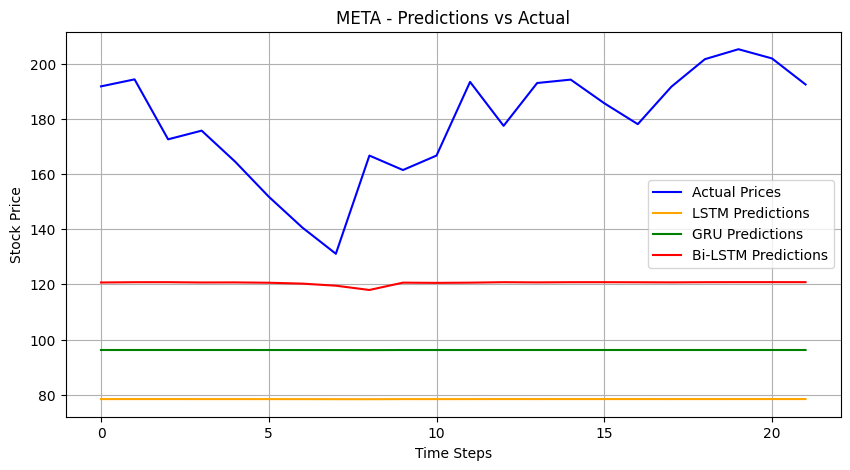


LSTM
Epoch 1/20
92/92 [==============================] - 1s 9ms/step - loss: 4007.9099
Epoch 2/20
92/92 [==============================] - 1s 9ms/step - loss: 3715.8879
Epoch 3/20
92/92 [==============================] - 1s 9ms/step - loss: 3593.1104
Epoch 4/20
92/92 [==============================] - 1s 6ms/step - loss: 3292.0850
Epoch 5/20
92/92 [==============================] - 1s 7ms/step - loss: 3150.6604
Epoch 6/20
92/92 [==============================] - 1s 7ms/step - loss: 2957.0818
Epoch 7/20
92/92 [==============================] - 1s 7ms/step - loss: 2790.9641
Epoch 8/20
92/92 [==============================] - 1s 7ms/step - loss: 2649.7666
Epoch 9/20
92/92 [==============================] - 1s 7ms/step - loss: 2538.2478
Epoch 10/20
92/92 [==============================] - 1s 7ms/step - loss: 2358.1772
Epoch 11/20
92/92 [==============================] - 1s 7ms/step - loss: 2251.9077
Epoch 12/20
92/92 [==============================] - 1s 7ms/step - loss: 2120.9885
Epoch 1

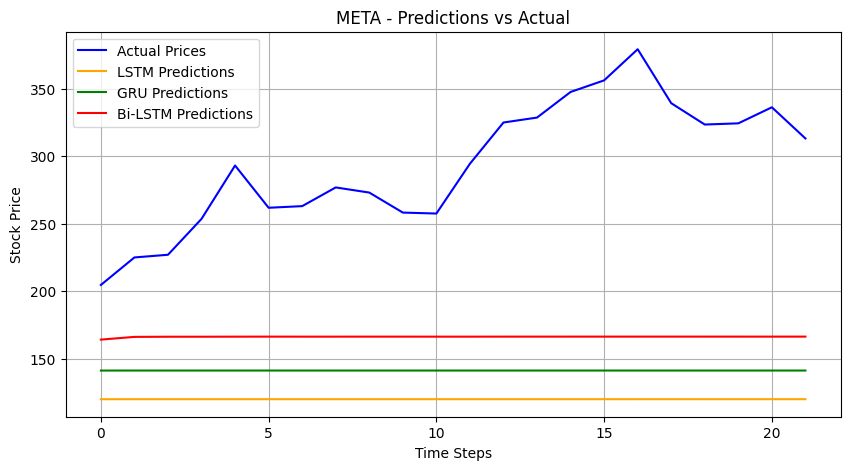


LSTM
Epoch 1/20
115/115 [==============================] - 1s 7ms/step - loss: 7090.6284
Epoch 2/20
115/115 [==============================] - 1s 7ms/step - loss: 6685.7402
Epoch 3/20
115/115 [==============================] - 1s 7ms/step - loss: 6335.9165
Epoch 4/20
115/115 [==============================] - 1s 6ms/step - loss: 6075.8228
Epoch 5/20
115/115 [==============================] - 1s 6ms/step - loss: 5775.2061
Epoch 6/20
115/115 [==============================] - 1s 9ms/step - loss: 5563.0718
Epoch 7/20
115/115 [==============================] - 1s 9ms/step - loss: 5350.4946
Epoch 8/20
115/115 [==============================] - 1s 9ms/step - loss: 5391.4844
Epoch 9/20
115/115 [==============================] - 1s 9ms/step - loss: 5095.1558
Epoch 10/20
115/115 [==============================] - 1s 10ms/step - loss: 4870.2227
Epoch 11/20
115/115 [==============================] - 1s 8ms/step - loss: 4917.7402
Epoch 12/20
115/115 [==============================] - 1s 7ms/step 

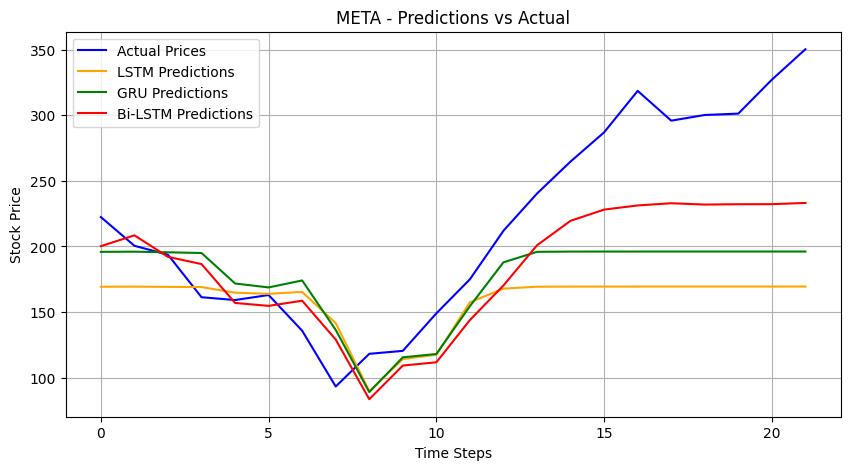

------------------------------------------------------------------
Stock: GOOGL

LSTM
Epoch 1/20
27/27 [==============================] - 5s 6ms/step - loss: 191.9427
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 140.5145
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 45.3092
Epoch 4/20
27/27 [==============================] - 0s 7ms/step - loss: 14.1678
Epoch 5/20
27/27 [==============================] - 0s 9ms/step - loss: 7.0865
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 4.0458
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 2.8551
Epoch 8/20
27/27 [==============================] - 0s 9ms/step - loss: 2.0851
Epoch 9/20
27/27 [==============================] - 0s 11ms/step - loss: 1.9212
Epoch 10/20
27/27 [==============================] - 0s 10ms/step - loss: 1.8486
Epoch 11/20
27/27 [==============================] - 0s 10ms/step - loss: 1.8106
Epoch 12/20
27/27 [===============

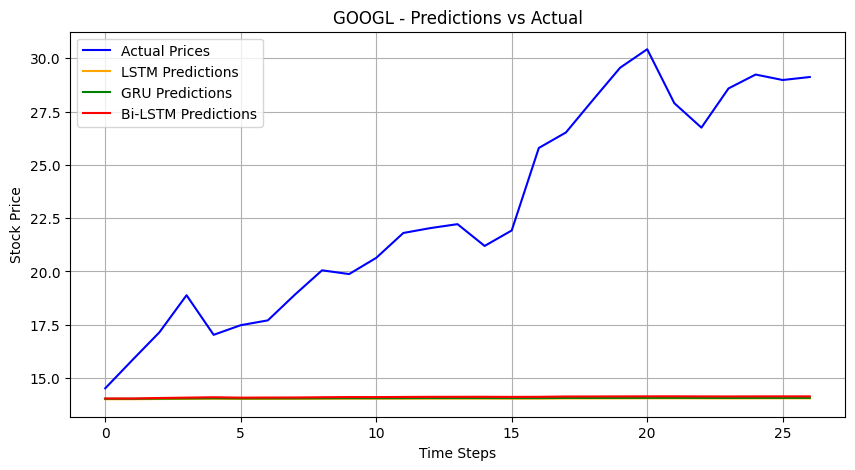


LSTM
Epoch 1/20
55/55 [==============================] - 0s 7ms/step - loss: 42.6881
Epoch 2/20
55/55 [==============================] - 0s 7ms/step - loss: 34.2401
Epoch 3/20
55/55 [==============================] - 0s 7ms/step - loss: 32.4773
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 32.5822
Epoch 5/20
55/55 [==============================] - 0s 6ms/step - loss: 32.3809
Epoch 6/20
55/55 [==============================] - 0s 8ms/step - loss: 32.2611
Epoch 7/20
55/55 [==============================] - 0s 8ms/step - loss: 32.1033
Epoch 8/20
55/55 [==============================] - 0s 8ms/step - loss: 31.1914
Epoch 9/20
55/55 [==============================] - 0s 8ms/step - loss: 24.9257
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 19.5282
Epoch 11/20
55/55 [==============================] - 0s 9ms/step - loss: 17.8401
Epoch 12/20
55/55 [==============================] - 0s 8ms/step - loss: 17.2280
Epoch 13/20
55/55 [============

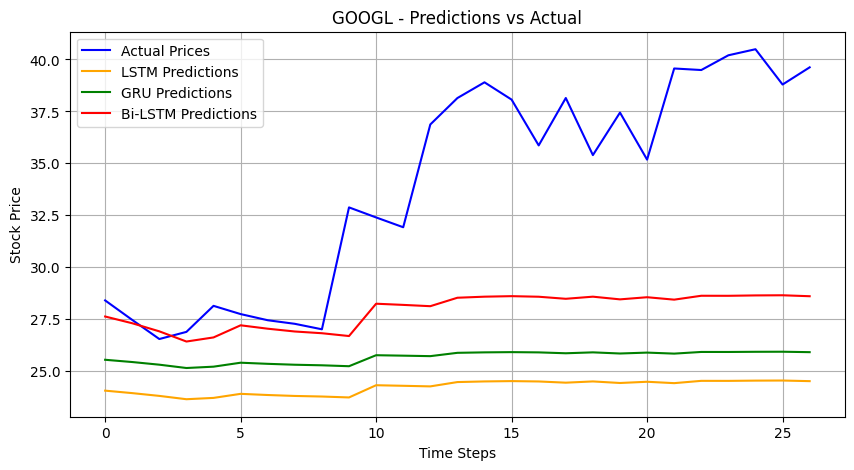


LSTM
Epoch 1/20
83/83 [==============================] - 1s 10ms/step - loss: 36.4896
Epoch 2/20
83/83 [==============================] - 1s 9ms/step - loss: 27.3867
Epoch 3/20
83/83 [==============================] - 1s 9ms/step - loss: 23.4559
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 17.7364
Epoch 5/20
83/83 [==============================] - 1s 7ms/step - loss: 14.4906
Epoch 6/20
83/83 [==============================] - 1s 7ms/step - loss: 13.9677
Epoch 7/20
83/83 [==============================] - 1s 7ms/step - loss: 10.4758
Epoch 8/20
83/83 [==============================] - 1s 7ms/step - loss: 10.0450
Epoch 9/20
83/83 [==============================] - 1s 7ms/step - loss: 9.4565
Epoch 10/20
83/83 [==============================] - 1s 6ms/step - loss: 12.4412
Epoch 11/20
83/83 [==============================] - 1s 7ms/step - loss: 9.3283
Epoch 12/20
83/83 [==============================] - 1s 7ms/step - loss: 8.4888
Epoch 13/20
83/83 [==============

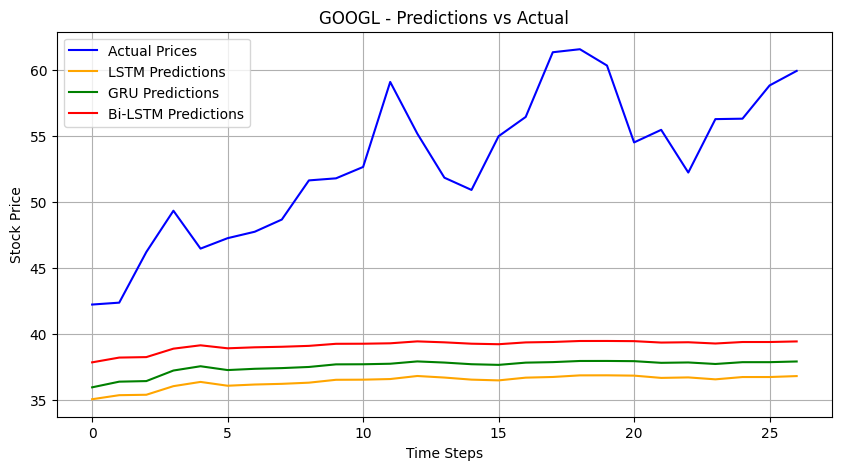


LSTM
Epoch 1/20
111/111 [==============================] - 1s 7ms/step - loss: 61.3425
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 43.3361
Epoch 3/20
111/111 [==============================] - 1s 7ms/step - loss: 38.2748
Epoch 4/20
111/111 [==============================] - 1s 8ms/step - loss: 29.9168
Epoch 5/20
111/111 [==============================] - 1s 10ms/step - loss: 29.1356
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 20.1502
Epoch 7/20
111/111 [==============================] - 1s 10ms/step - loss: 20.0904
Epoch 8/20
111/111 [==============================] - 1s 9ms/step - loss: 19.2131
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 16.7869
Epoch 10/20
111/111 [==============================] - 1s 8ms/step - loss: 15.6251
Epoch 11/20
111/111 [==============================] - 1s 7ms/step - loss: 17.1444
Epoch 12/20
111/111 [==============================] - 1s 7ms/step - loss: 13.2969
Epoch

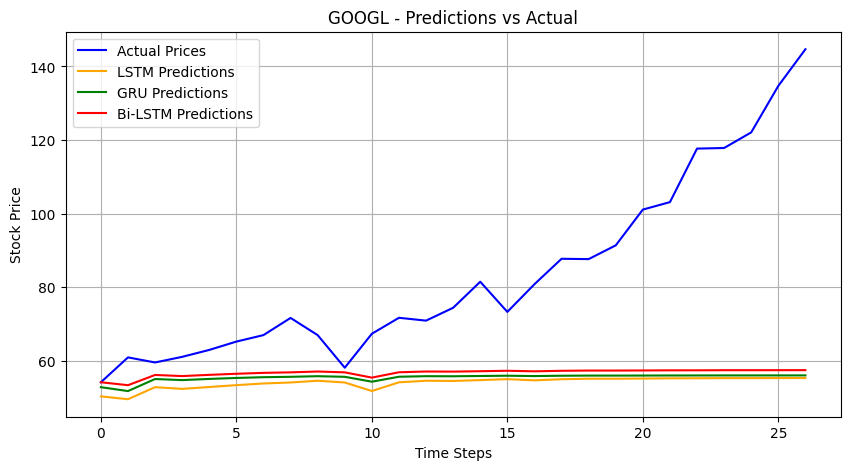


LSTM
Epoch 1/20
139/139 [==============================] - 2s 12ms/step - loss: 263.5856
Epoch 2/20
139/139 [==============================] - 1s 9ms/step - loss: 227.5594
Epoch 3/20
139/139 [==============================] - 1s 9ms/step - loss: 208.4918
Epoch 4/20
139/139 [==============================] - 1s 9ms/step - loss: 193.0384
Epoch 5/20
139/139 [==============================] - 1s 8ms/step - loss: 196.0844
Epoch 6/20
139/139 [==============================] - 1s 6ms/step - loss: 171.2427
Epoch 7/20
139/139 [==============================] - 1s 8ms/step - loss: 162.5313
Epoch 8/20
139/139 [==============================] - 1s 8ms/step - loss: 158.1179
Epoch 9/20
139/139 [==============================] - 1s 7ms/step - loss: 147.1975
Epoch 10/20
139/139 [==============================] - 1s 7ms/step - loss: 149.9121
Epoch 11/20
139/139 [==============================] - 1s 7ms/step - loss: 132.3709
Epoch 12/20
139/139 [==============================] - 1s 9ms/step - loss: 130

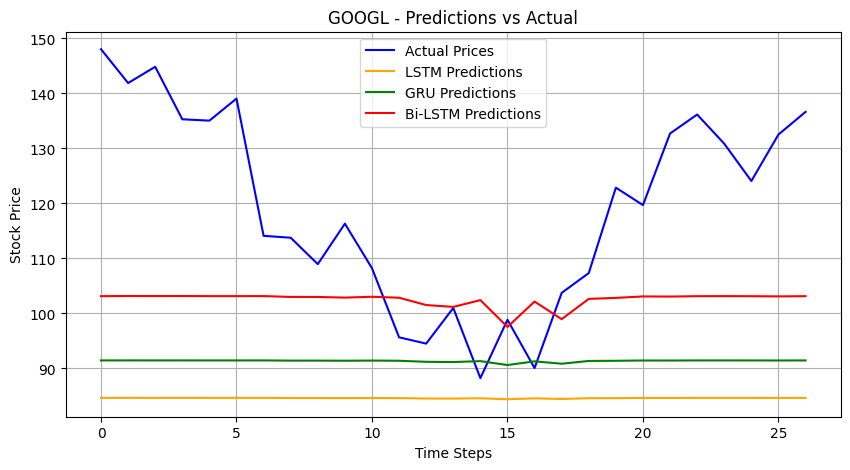

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Number of splits for time series cross-validation
cv_n_splits = 5

# Create TimeSeriesSplit object
tss = TimeSeriesSplit(n_splits=cv_n_splits)

# Define more complex models outside the loop
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_gru_model():
    model = Sequential()
    model.add(GRU(100, input_shape=(1, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_bi_lstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(100, input_shape=(1, 1), return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Metrics for evaluation
evaluation_metrics = {'LSTM': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'GRU': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'Bi-LSTM': {'MAE': [], 'MSE': [], 'MAPE': []}}


# Iterate over each stock's data and perform time series cross-validation
for symbol, stock_data in filtered_historical_data.items():

    print('------------------------------------------------------------------')
    print(f"Stock: {symbol}")
    # Create models
    lstm_model = create_lstm_model()
    gru_model = create_gru_model()
    bi_lstm_model = create_bi_lstm_model()

    for train_index, test_index in tss.split(stock_data):
        train_data, test_data = stock_data.iloc[train_index], stock_data.iloc[test_index]

        # Extract 'Close' prices
        train_close_prices = train_data['Close'].values.reshape(-1, 1)
        test_close_prices = test_data['Close'].values.reshape(-1, 1)

        # Prepare feature and target data for training
        X_train = train_close_prices[:-1]
        y_train = train_close_prices[1:]

        # Reshape data for LSTM and GRU input shape (samples, time steps, features)
        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

        # Train models
        print('\nLSTM')
        lstm_model.fit(X_train, y_train, epochs=20, batch_size=1)
        print('\nGRU')
        gru_model.fit(X_train, y_train, epochs=20, batch_size=1)
        print('\nBi-LSTM')
        bi_lstm_model.fit(X_train, y_train, epochs=20, batch_size=1)

        # Prepare test data for predictions
        X_test = test_close_prices[:-1]
        y_test = test_close_prices[1:]
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

        # Make predictions
        lstm_predictions = lstm_model.predict(X_test)
        gru_predictions = gru_model.predict(X_test)
        bi_lstm_predictions = bi_lstm_model.predict(X_test)

        # Reverse the normalization to get actual prices
        lstm_predictions_actual = lstm_predictions
        gru_predictions_actual = gru_predictions
        bi_lstm_predictions_actual = bi_lstm_predictions
        y_test_actual = y_test

        # Evaluate models
        lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions_actual)
        lstm_mse = mean_squared_error(y_test_actual, lstm_predictions_actual)
        lstm_mape = np.mean(np.abs((y_test_actual - lstm_predictions_actual) / y_test_actual)) * 100

        gru_mae = mean_absolute_error(y_test_actual, gru_predictions_actual)
        gru_mse = mean_squared_error(y_test_actual, gru_predictions_actual)
        gru_mape = np.mean(np.abs((y_test_actual - gru_predictions_actual) / y_test_actual)) * 100

        bi_lstm_mae = mean_absolute_error(y_test_actual, bi_lstm_predictions_actual)
        bi_lstm_mse = mean_squared_error(y_test_actual, bi_lstm_predictions_actual)
        bi_lstm_mape = np.mean(np.abs((y_test_actual - bi_lstm_predictions_actual) / y_test_actual)) * 100

        print(f"LSTM - MAE: {lstm_mae}, MSE: {lstm_mse}, MAPE: {lstm_mape}%")
        print(f"GRU - MAE: {gru_mae}, MSE: {gru_mse}, MAPE: {gru_mape}%")
        print(f"Bi-LSTM - MAE: {bi_lstm_mae}, MSE: {bi_lstm_mse}, MAPE: {bi_lstm_mape}%")

        # Record metrics for comparison
        evaluation_metrics['LSTM']['MAE'].append(lstm_mae)
        evaluation_metrics['LSTM']['MSE'].append(lstm_mse)
        evaluation_metrics['LSTM']['MAPE'].append(lstm_mape)

        evaluation_metrics['GRU']['MAE'].append(gru_mae)
        evaluation_metrics['GRU']['MSE'].append(gru_mse)
        evaluation_metrics['GRU']['MAPE'].append(gru_mape)

        evaluation_metrics['Bi-LSTM']['MAE'].append(bi_lstm_mae)
        evaluation_metrics['Bi-LSTM']['MSE'].append(bi_lstm_mse)
        evaluation_metrics['Bi-LSTM']['MAPE'].append(bi_lstm_mape)

        print(f"LSTM Mean Squared Error: {lstm_mse}")
        print(f"GRU Mean Squared Error: {gru_mse}")
        print(f"Bi-LSTM Mean Squared Error: {bi_lstm_mse}")

        # Plot predictions vs actual for each model
        plt.figure(figsize=(10, 5))
        plt.plot(y_test_actual, label='Actual Prices', color='blue')
        plt.plot(lstm_predictions_actual, label='LSTM Predictions', color='orange')
        plt.plot(gru_predictions_actual, label='GRU Predictions', color='green')
        plt.plot(bi_lstm_predictions_actual, label='Bi-LSTM Predictions', color='red')
        plt.title(f'{symbol} - Predictions vs Actual')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.grid('both')
        plt.legend()
        plt.show()


In [ ]:
# Compare models based on metrics
for model_name, metrics in evaluation_metrics.items():
    avg_mae = np.mean(metrics['MAE'])
    avg_mse = np.mean(metrics['MSE'])
    avg_mape = np.mean(metrics['MAPE'])

    print(f"\n{model_name} Model Average Metrics:")
    print(f"Average MAE: {avg_mae}")
    print(f"Average MSE: {avg_mse}")
    print(f"Average MAPE: {avg_mape}%")


LSTM Model Average Metrics:
Average MAE: 50.94466480152374
Average MSE: 5521.584809899255
Average MAPE: 40.52718169621607%

GRU Model Average Metrics:
Average MAE: 45.514466686056124
Average MSE: 4453.2502192372085
Average MAPE: 36.52686990607925%

Bi-LSTM Model Average Metrics:
Average MAE: 38.350504893293284
Average MSE: 3198.1386293577425
Average MAPE: 31.459702128596085%


# MLP, CNN, Conv-LSTM

---------------------------------------------------------
Stock: AAPL

MLP
Epoch 1/20
27/27 [==============================] - 1s 2ms/step - loss: 0.0816
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0230
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0208
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 6/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 8/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 9/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 11/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 12/20
27/27 [==============================] - 0

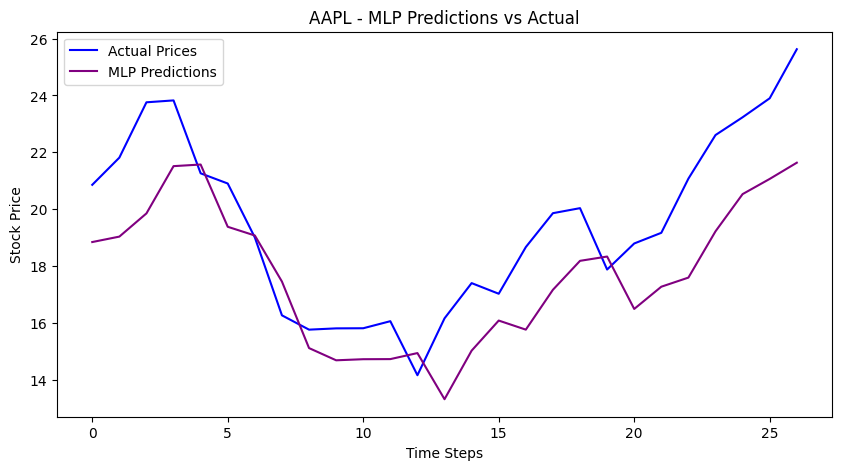


MLP
Epoch 1/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 13/20
55/55 [=========================

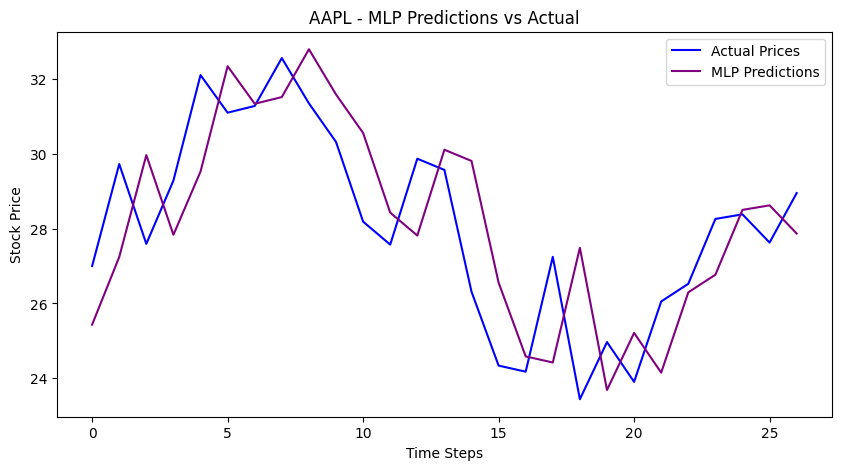


MLP
Epoch 1/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 2/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 4/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 5/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 6/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 7/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 8/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 9/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 10/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 11/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 12/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 13/20
83/83 [=========================

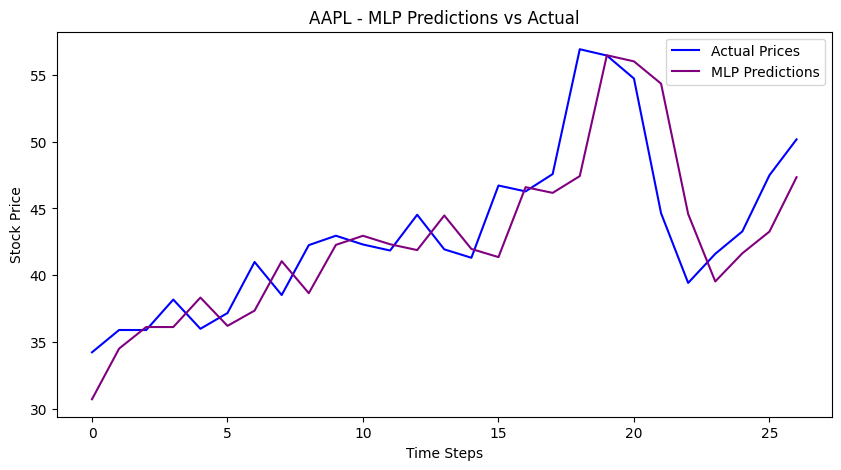


MLP
Epoch 1/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 2/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 3/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 4/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 5/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 6/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 7/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 8/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 9/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 11/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 12/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 13/20
111/111 

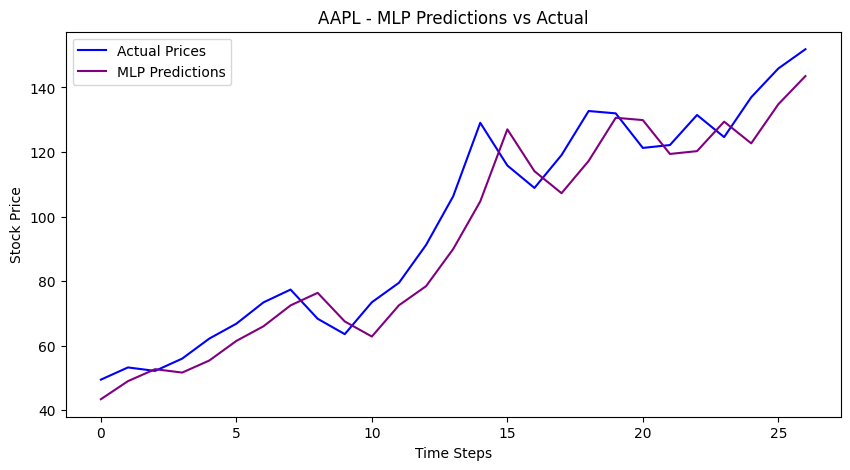


MLP
Epoch 1/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 2/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 3/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 4/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 5/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 7/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 8/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 9/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 10/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 11/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 12/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 13/20
139/139 

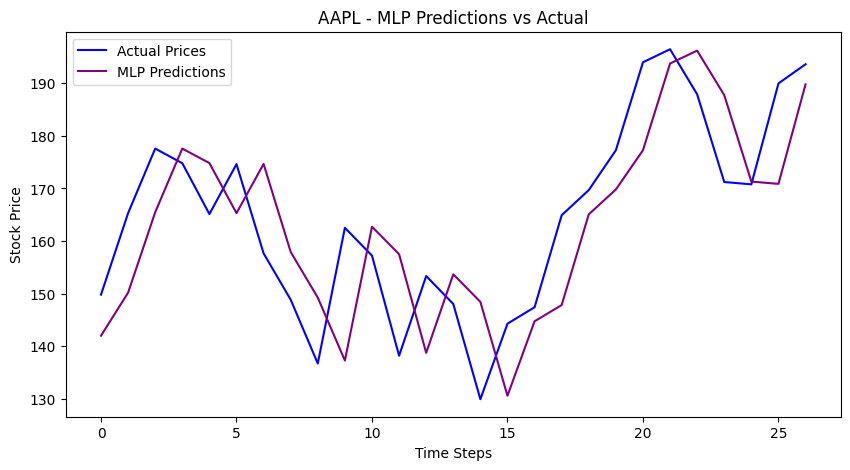

---------------------------------------------------------
Stock: MSFT

MLP
Epoch 1/20
27/27 [==============================] - 1s 3ms/step - loss: 0.0780
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0988
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0686
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 5/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0385
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0491
Epoch 9/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 11/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 12/20
27/27 [==============================] - 0

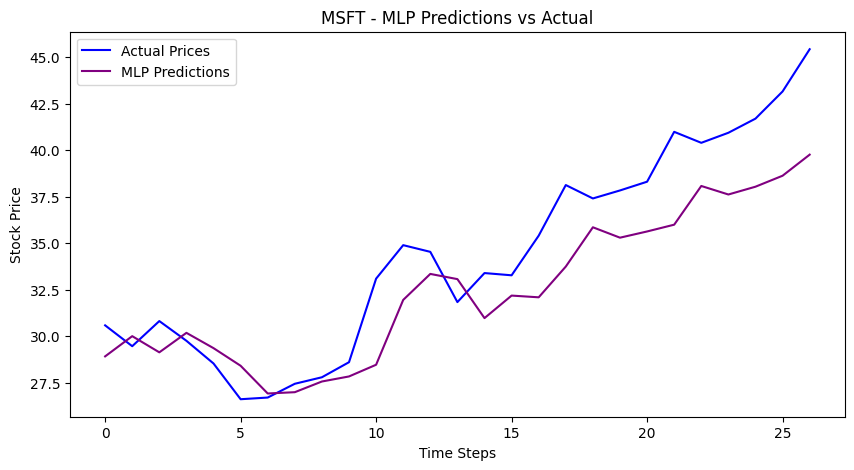


MLP
Epoch 1/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 3/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 5/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 6/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0109
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0105
Epoch 8/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 9/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0115
Epoch 10/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 13/20
55/55 [========================

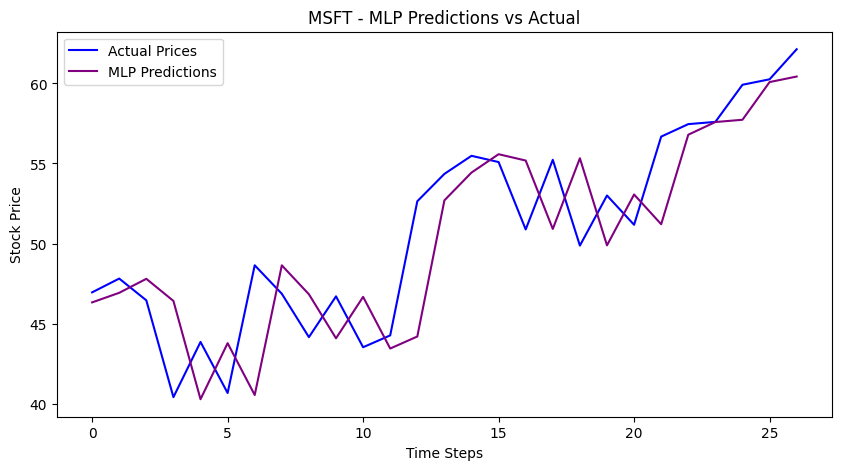


MLP
Epoch 1/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0070
Epoch 2/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0070
Epoch 3/20
83/83 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0069
Epoch 5/20
83/83 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 6/20
83/83 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 7/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 8/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 9/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 10/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 11/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 12/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 13/20
83/83 [=========================

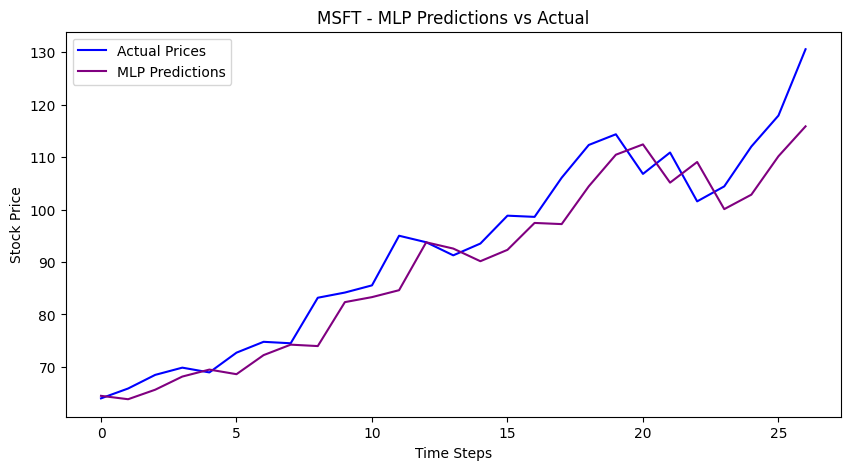


MLP
Epoch 1/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 2/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 3/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4/20
111/111 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 5/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0023
Epoch 6/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 7/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 8/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 9/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 10/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 11/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 13/20
111/111 

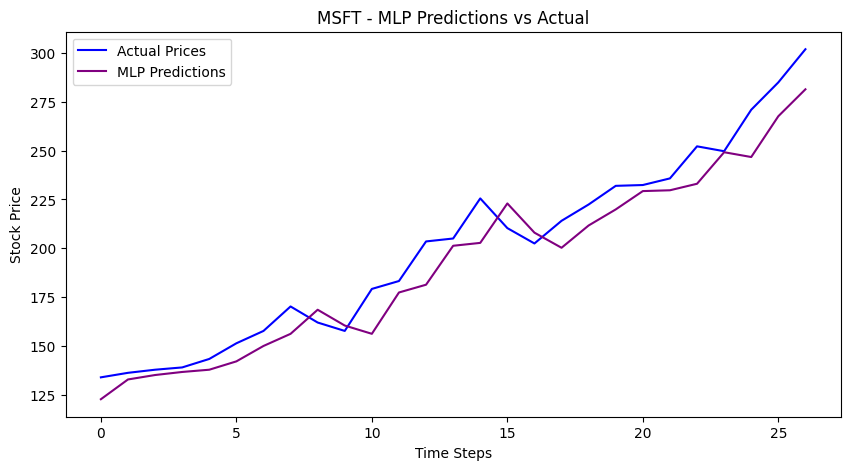


MLP
Epoch 1/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 2/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 3/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 6/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 8/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 9/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 10/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 11/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 12/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 13/20
139/139 

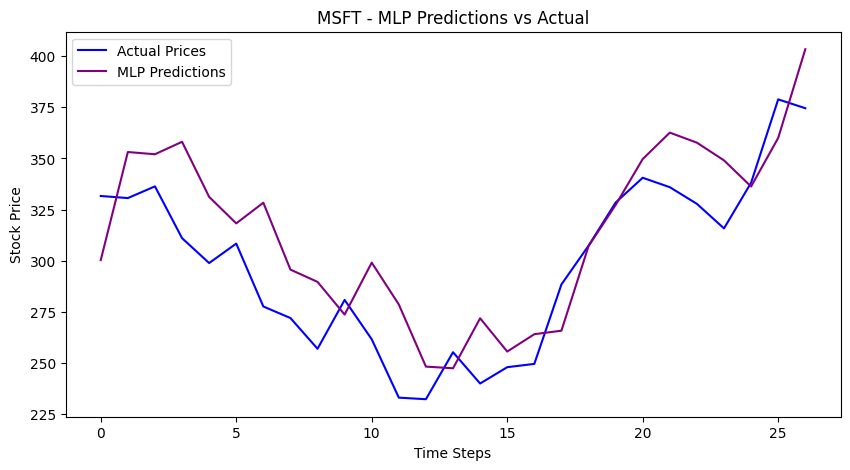

---------------------------------------------------------
Stock: AMZN

MLP
Epoch 1/20
27/27 [==============================] - 1s 2ms/step - loss: 0.1001
Epoch 2/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0235
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0250
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 8/20
27/27 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 9/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 10/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 11/20
27/27 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 12/20
27/27 [==============================] - 0

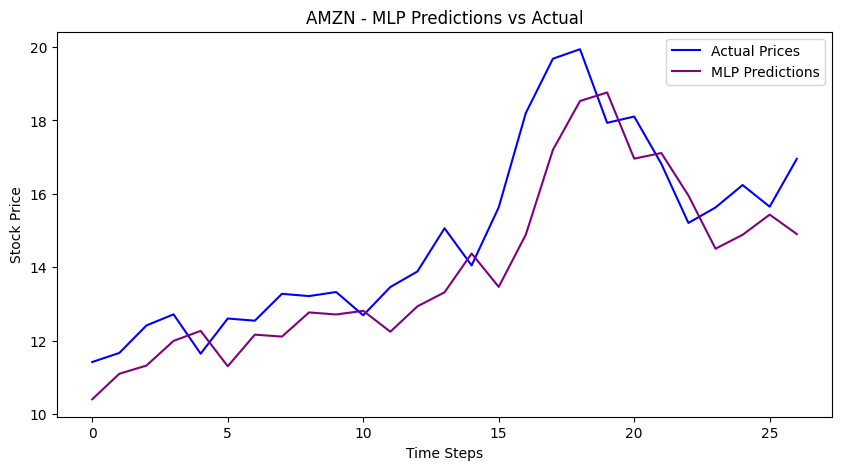


MLP
Epoch 1/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 4/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 11/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 12/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 13/20
55/55 [=========================

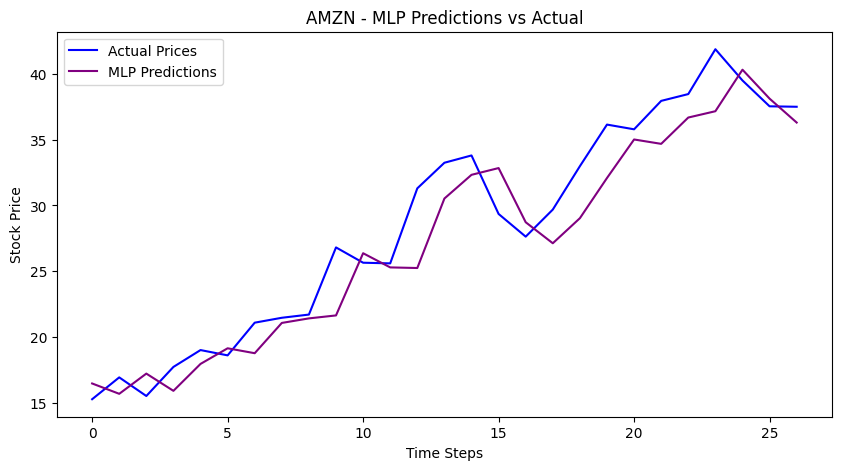


MLP
Epoch 1/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 2/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 3/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0041
Epoch 5/20
83/83 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 6/20
83/83 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 7/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 8/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 9/20
83/83 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 10/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 11/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/20
83/83 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 13/20
83/83 [=========================

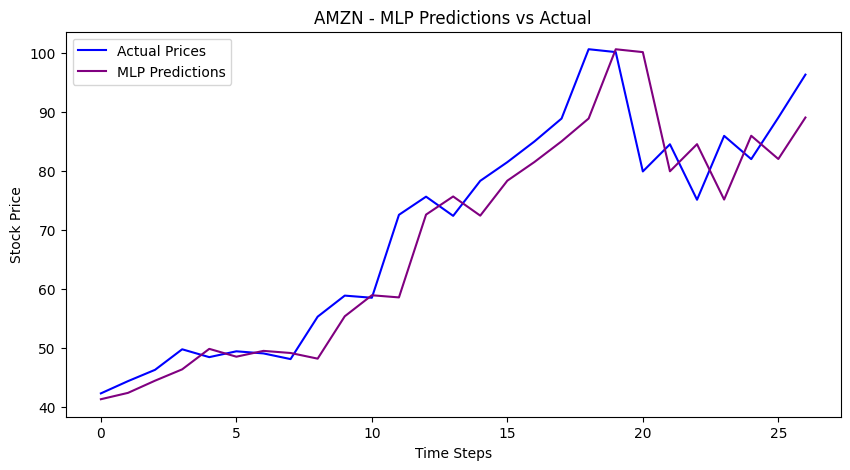


MLP
Epoch 1/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 2/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 4/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 5/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 6/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 7/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 8/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 9/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 10/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 11/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 12/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 13/20
111/111 

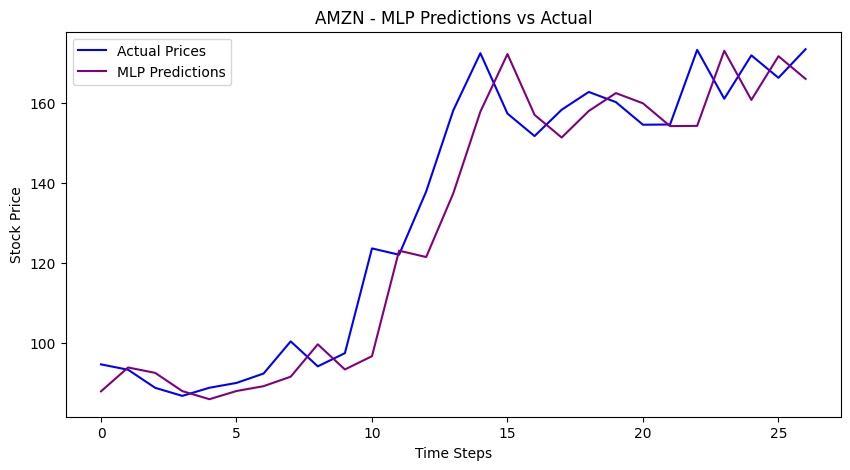


MLP
Epoch 1/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 2/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 4/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 6/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 7/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 8/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 9/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 10/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 11/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 12/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 13/20
139/139 

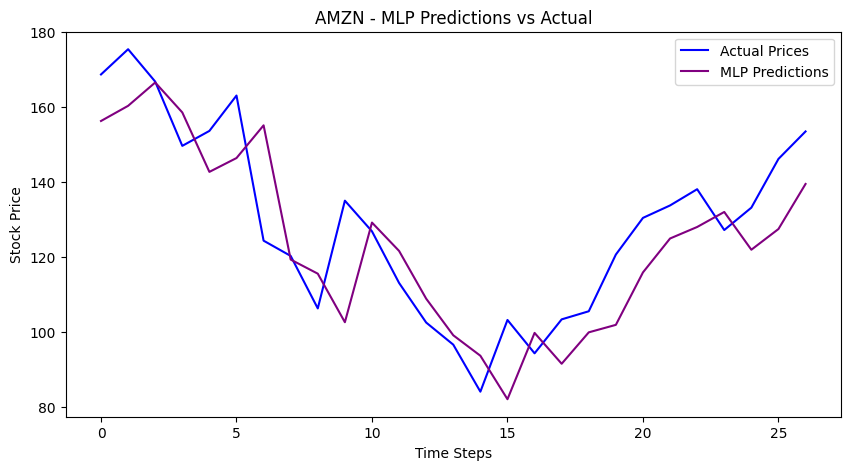

---------------------------------------------------------
Stock: META

MLP
Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.1810
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0303
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0442
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0260
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0280
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0302
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0257
Epoch 12/20
23/23 [==============================] - 0

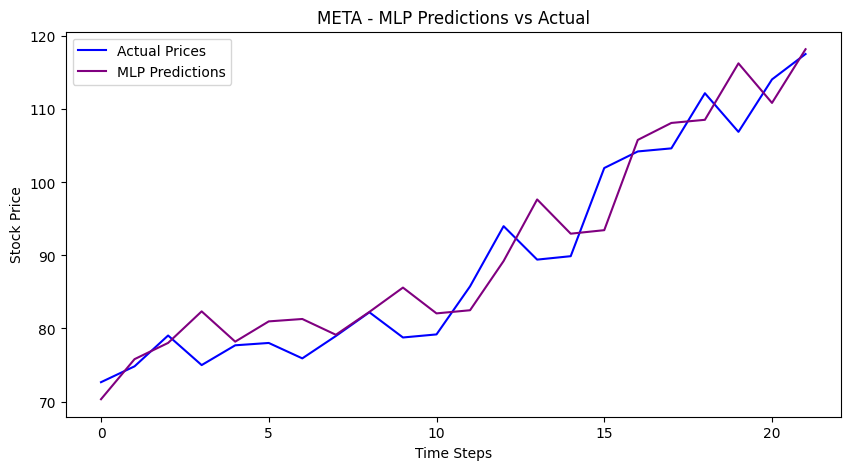


MLP
Epoch 1/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 3/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 4/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 8/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 9/20
46/46 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 10/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 11/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 12/20
46/46 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 13/20
46/46 [=========================

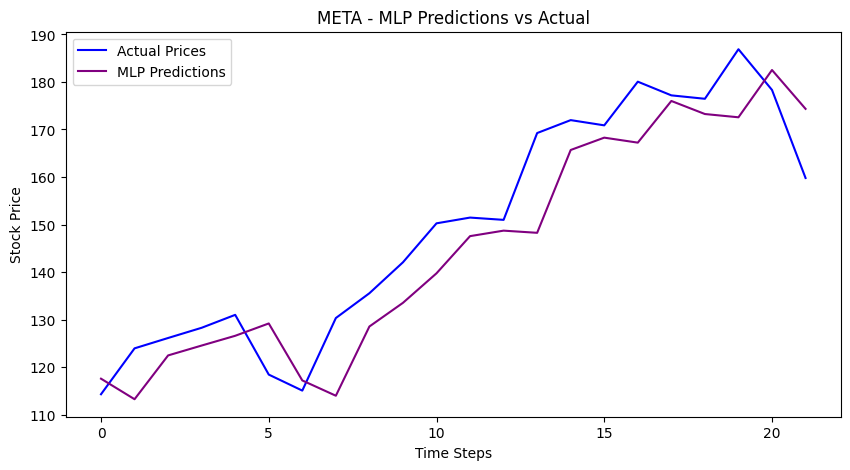


MLP
Epoch 1/20
69/69 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 2/20
69/69 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 3/20
69/69 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 5/20
69/69 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 9/20
69/69 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 10/20
69/69 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 11/20
69/69 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 12/20
69/69 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 13/20
69/69 [=========================

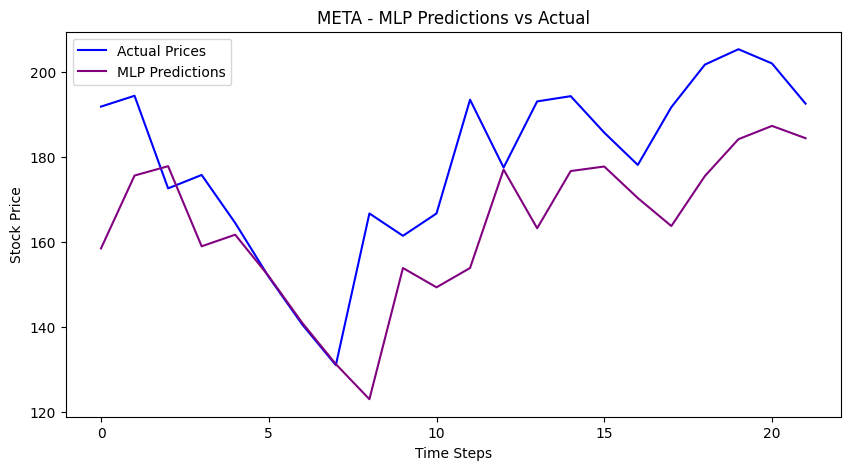


MLP
Epoch 1/20
92/92 [==============================] - 1s 10ms/step - loss: 0.0080
Epoch 2/20
92/92 [==============================] - 1s 11ms/step - loss: 0.0039
Epoch 3/20
92/92 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 4/20
92/92 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 5/20
92/92 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0048
Epoch 7/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0050
Epoch 8/20
92/92 [==============================] - 1s 11ms/step - loss: 0.0069
Epoch 9/20
92/92 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 10/20
92/92 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 11/20
92/92 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 12/20
92/92 [==============================] - 1s 6ms/step - loss: 0.0049
Epoch 13/20
92/92 [======================

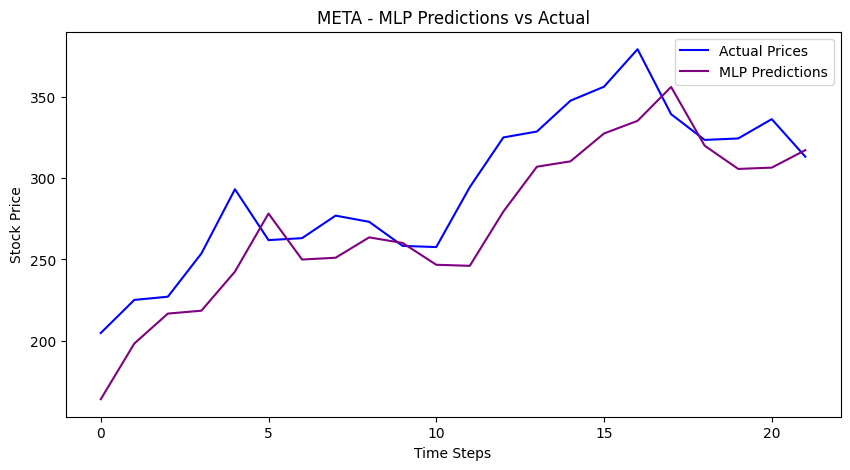


MLP
Epoch 1/20
115/115 [==============================] - 1s 12ms/step - loss: 0.0028
Epoch 2/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 3/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 4/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0027
Epoch 5/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0028
Epoch 6/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 7/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 8/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0035
Epoch 9/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0027
Epoch 10/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 11/20
115/115 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 12/20
115/115 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 13/20
115/11

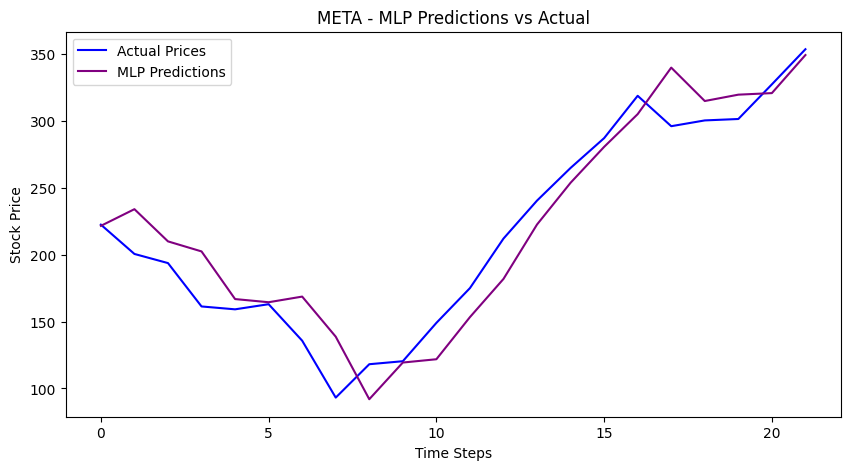

---------------------------------------------------------
Stock: GOOGL

MLP
Epoch 1/20
27/27 [==============================] - 2s 8ms/step - loss: 0.0888
Epoch 2/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0713
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0948
Epoch 4/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0576
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0717
Epoch 6/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0676
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0664
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0691
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0613
Epoch 10/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0604
Epoch 11/20
27/27 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 12/20
27/27 [==============================] 

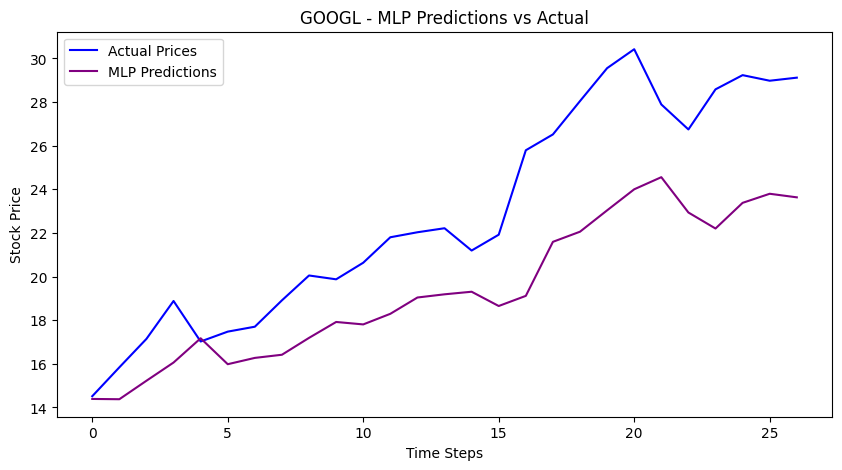


MLP
Epoch 1/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0153
Epoch 2/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 3/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 4/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 5/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 6/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 7/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 8/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 9/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 10/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 11/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 12/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 13/20
55/55 [=========================

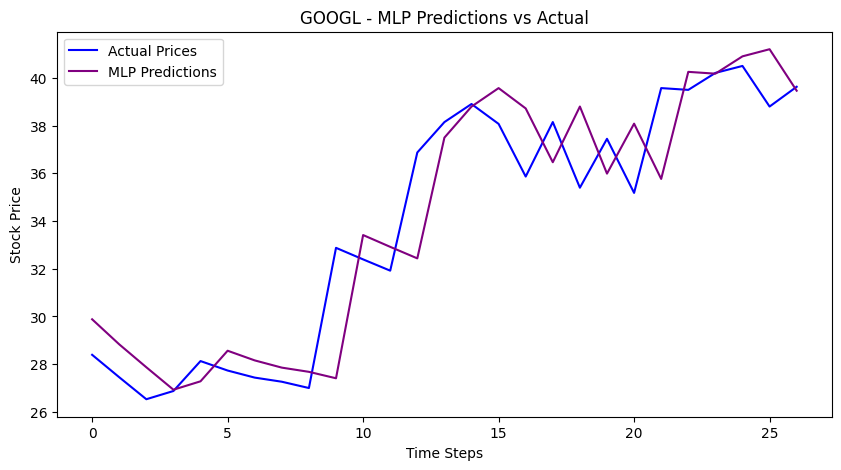


MLP
Epoch 1/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 2/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 3/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 4/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 5/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 6/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 7/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 8/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 9/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 10/20
83/83 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 11/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 12/20
83/83 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/20
83/83 [=========================

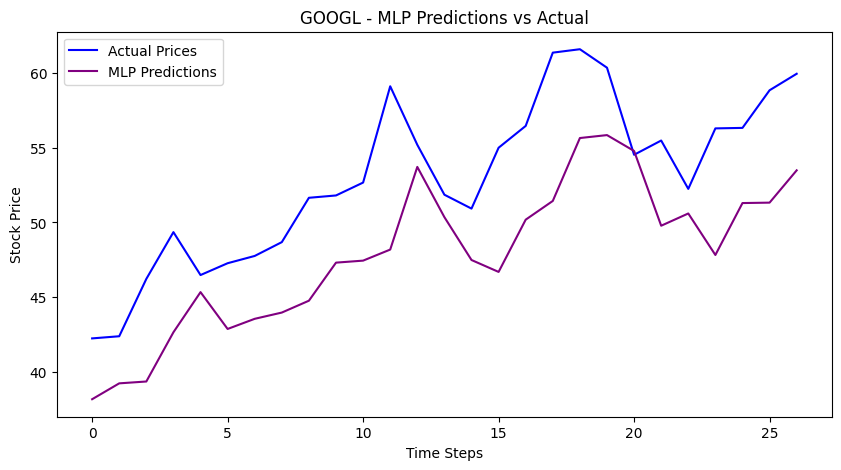


MLP
Epoch 1/20
111/111 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 2/20
111/111 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 3/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 4/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 5/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 7/20
111/111 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 8/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 10/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 11/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 12/20
111/111 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 13/20
111/111 

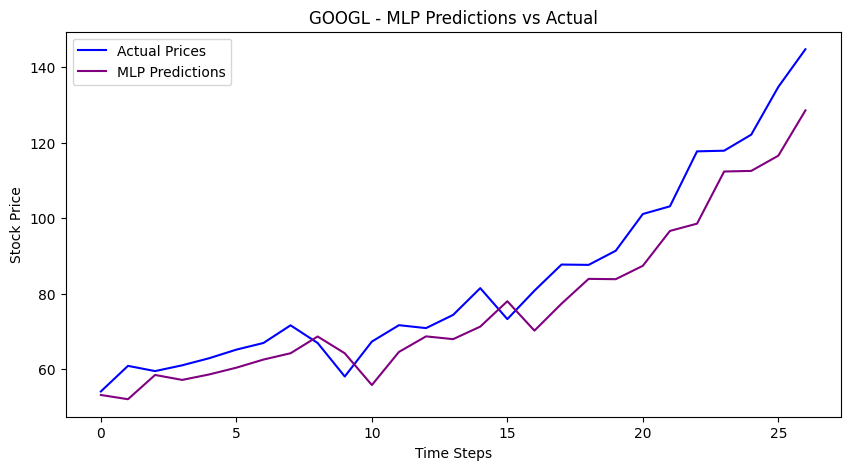


MLP
Epoch 1/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 2/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 3/20
139/139 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 5/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 6/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 8/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 9/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 10/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 12/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/20
139/139 

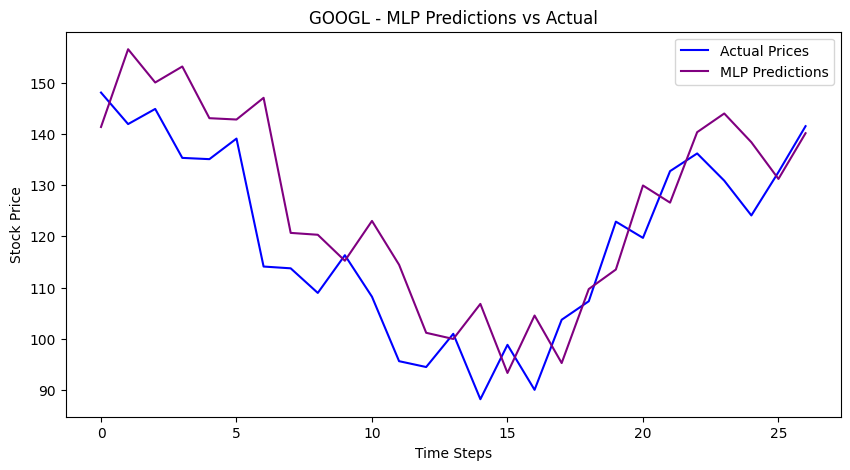

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout, Flatten, Conv1D, ConvLSTM2D, Reshape
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Number of splits for time series cross-validation
cv_n_splits = 5

# Create TimeSeriesSplit object
tss = TimeSeriesSplit(n_splits=cv_n_splits)

# Define more complex models outside the loop
def create_mlp_model(in_shape):
    model = Sequential()
    model.add(Dense(100, input_shape=(in_shape,1)))
    model.add(Dropout(0.5))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model



# Metrics for evaluation
evaluation_metrics = {'MLP': {'MAE': [], 'MSE': [], 'MAPE': []},
                      }
# Iterate over each stock's data and perform time series cross-validation
for symbol, stock_data in filtered_historical_data.items():

    print('---------------------------------------------------------')
    print(f"Stock: {symbol}")
    in_shape= filtered_historical_data[symbol].shape[0]
    # Create models
    mlp_model = create_mlp_model(in_shape)

    for train_index, test_index in tss.split(stock_data):
        train_data, test_data = stock_data.iloc[train_index], stock_data.iloc[test_index]

        # Extract 'Close' prices
        train_close_prices = train_data['Close'].values.reshape(-1, 1)
        test_close_prices = test_data['Close'].values.reshape(-1, 1)

        # Normalize 'Close' prices using MinMaxScaler fitted on the training data
        scaler = MinMaxScaler()
        train_close_prices_normalized = scaler.fit_transform(train_close_prices)
        test_close_prices_normalized = scaler.transform(test_close_prices)

        # Prepare feature and target data for training
        X_train = train_close_prices_normalized[:-1]
        y_train = train_close_prices_normalized[1:]



        # Train models
        print('\nMLP')
        mlp_model.fit(X_train, y_train, epochs=20, batch_size=1)

        # Prepare test data for predictions
        X_test = test_close_prices_normalized[:-1]
        y_test = test_close_prices_normalized[1:]
        # print(X_test.shape)


        # Make predictions
        mlp_predictions = np.squeeze(mlp_model.predict(X_test)).reshape(-1, 1)

        # Reverse the normalization to get actual prices
        mlp_predictions_actual = scaler.inverse_transform(mlp_predictions)
        y_test_actual = scaler.inverse_transform(y_test)

        # Evaluate models (you may use other metrics as well)
        mlp_mse = mean_squared_error(y_test_actual, mlp_predictions_actual)

        # Evaluate models
        mlp_mae = mean_absolute_error(y_test_actual, mlp_predictions_actual)
        mlp_mse = mean_squared_error(y_test_actual, mlp_predictions_actual)
        mlp_mape = np.mean(np.abs((y_test_actual - mlp_predictions_actual) / y_test_actual)) * 100

        print(f"MLP Mean Squared Error: {mlp_mse}")

        print(f"MLP - MAE: {mlp_mae}, MSE: {mlp_mse}, MAPE: {mlp_mape}%")

        # Record metrics for comparison
        evaluation_metrics['MLP']['MAE'].append(mlp_mae)
        evaluation_metrics['MLP']['MSE'].append(mlp_mse)
        evaluation_metrics['MLP']['MAPE'].append(mlp_mape)
        # Plot predictions vs actual for each model
        plt.figure(figsize=(10, 5))
        plt.plot(y_test_actual, label='Actual Prices', color='blue')
        plt.plot(mlp_predictions_actual, label='MLP Predictions', color='purple')
        plt.title(f'{symbol} - MLP Predictions vs Actual')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()


In [ ]:
for model_name, metrics in evaluation_metrics.items():
    avg_mae = np.mean(metrics['MAE'])
    avg_mse = np.mean(metrics['MSE'])
    avg_mape = np.mean(metrics['MAPE'])

    print(f"\n{model_name} Model Average Metrics:")
    print(f"Average MAE: {avg_mae}")
    print(f"Average MSE: {avg_mse}")
    print(f"Average MAPE: {avg_mape}%")


MLP Model Average Metrics:
Average MAE: 8.048645312505137
Average MSE: 154.2781906009999
Average MAPE: 7.678782171372132%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout, Flatten, Conv1D, ConvLSTM2D, Reshape, MaxPooling1D
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

def prepare_data(time_series, window_size=1):
        X, y = [], []
        for i in range(len(time_series) - window_size):
            X.append(time_series[i:i+window_size])
            y.append(time_series[i+window_size])
        return np.array(X), np.array(y)


def create_cnn_model(in_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_conv_lstm_model(in_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=in_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# Number of splits for time series cross-validation
cv_n_splits = 5

# Create TimeSeriesSplit object
tss = TimeSeriesSplit(n_splits=cv_n_splits)

evaluation_metrics = {'CNN': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'Conv-LSTM': {'MAE': [], 'MSE': [], 'MAPE': []}}

# Iterate over each stock's data and perform time series cross-validation
for symbol, stock_data in filtered_historical_data.items():

    for train_index, test_index in tss.split(stock_data):
        train_data, test_data = stock_data.iloc[train_index], stock_data.iloc[test_index]

        # Extract 'Close' prices
        train_close_prices = train_data['Close'].values.reshape(-1, 1)
        test_close_prices = test_data['Close'].values.reshape(-1, 1)

        # Normalize 'Close' prices using MinMaxScaler fitted on the training data
        scaler = MinMaxScaler()
        train_close_prices_normalized = scaler.fit_transform(train_close_prices)
        test_close_prices_normalized = scaler.transform(test_close_prices)

        # Prepare feature and target data for training
        X_train= train_close_prices_normalized[:-1]
        y_train= train_close_prices_normalized[1:]

        # Prepare test data for predictions
        X_test= test_close_prices_normalized[:-1]
        y_test= test_close_prices_normalized[1:]

        X_train, y_train = prepare_data(train_close_prices_normalized)
        X_test, y_test = prepare_data(test_close_prices_normalized)

        np.save(f'{symbol}_X_train.npy', X_train)
        np.save(f'{symbol}_y_train.npy', y_train)
        np.save(f'{symbol}_X_test.npy', X_test)
        np.save(f'{symbol}_y_test.npy', y_test)



for symbol, stock_data in filtered_historical_data.items():
    X_train_scaled = np.load(f'{symbol}_X_train.npy', allow_pickle=True)
    y_train_scaled = np.load(f'{symbol}_y_train.npy', allow_pickle=True)
    X_test_scaled = np.load(f'{symbol}_X_test.npy', allow_pickle=True)
    y_test_scaled = np.load(f'{symbol}_y_test.npy', allow_pickle=True)

    print(X_train_scaled.shape)

    print('---------------------------------------------------------')
    print(f"Stock: {symbol}")

    # Train models
    print('\nCNN')
    cnn_model = create_cnn_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))
    history = cnn_model.fit(X_train_scaled, X_train_scaled, epochs=60, batch_size=32)
    cnn_predictions = cnn_model.predict(X_test_scaled)

    print('\nConv-LSTM')
    conv_lstm_model = create_conv_lstm_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))
    history = cnn_model.fit(X_train_scaled, X_train_scaled, epochs=60, batch_size=32)
    conv_lstm_predictions = conv_lstm_model.predict(X_test_scaled)

    # Reverse the normalization to get actual prices
    cnn_predictions_actual = scaler.inverse_transform(cnn_predictions)
    y_test_actual = scaler.inverse_transform(y_test_scaled)
    # Evaluate models
    cnn_mae = mean_absolute_error(y_test_actual, cnn_predictions_actual)
    cnn_mse = mean_squared_error(y_test_actual, cnn_predictions_actual)
    cnn_mape = np.mean(np.abs((y_test_actual - cnn_predictions_actual) / y_test_actual)) * 100

    # Reverse the normalization to get actual prices
    conv_lstm_predictions_actual = scaler.inverse_transform(conv_lstm_predictions)
    # Evaluate models
    conv_lstm_mae = mean_absolute_error(y_test_actual, conv_lstm_predictions_actual)
    conv_lstm_mse = mean_squared_error(y_test_actual, conv_lstm_predictions_actual)
    conv_lstm_mape = np.mean(np.abs((y_test_actual - conv_lstm_predictions_actual) / y_test_actual)) * 100

    evaluation_metrics['CNN']['MAE'].append(cnn_mae)
    evaluation_metrics['CNN']['MSE'].append(cnn_mse)
    evaluation_metrics['CNN']['MAPE'].append(cnn_mape)
    evaluation_metrics['Conv-LSTM']['MAE'].append(conv_lstm_mae)
    evaluation_metrics['Conv-LSTM']['MSE'].append(conv_lstm_mse)
    evaluation_metrics['Conv-LSTM']['MAPE'].append(conv_lstm_mape)

    # Print results
    print(f"CNN - MAE: {cnn_mae}, MSE: {cnn_mse}, MAPE: {cnn_mape}%")
    print(f"Conv-LSTM - MAE: {conv_lstm_mae}, MSE: {conv_lstm_mse}, MAPE: {conv_lstm_mape}%")


    plt.figure(figsize=(10, 5))
    plt.plot(y_test_actual, label='Actual Prices', color='blue')
    plt.plot(cnn_predictions_actual, label='CNN Model Predictions', color='red')
    plt.plot(conv_lstm_predictions_actual, label='Conv-LSTM Model Predictions', color='green')
    plt.title(f'{symbol} - Predictions vs Actual')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.grid()
    plt.legend()
    plt.show()










(139, 1, 1)
---------------------------------------------------------
Stock: AAPL

CNN


ValueError: ignored

In [ ]:
for model_name, metrics in evaluation_metrics.items():
    avg_mae = np.mean(metrics['MAE'])
    avg_mse = np.mean(metrics['MSE'])
    avg_mape = np.mean(metrics['MAPE'])

    print(f"\n{model_name} Model Average Metrics:")
    print(f"Average MAE: {avg_mae}")
    print(f"Average MSE: {avg_mse}")
    print(f"Average MAPE: {avg_mape}%")

# + Naive forecast

------------------------------------------------------------------
Stock: AAPL

LSTM
Epoch 1/20
27/27 [==============================] - 6s 9ms/step - loss: 0.1769
Epoch 2/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0735
Epoch 3/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0334
Epoch 4/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0356
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0285
Epoch 6/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 7/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 8/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0109
Epoch 9/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 10/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 11/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 12/20
27/27 [======================

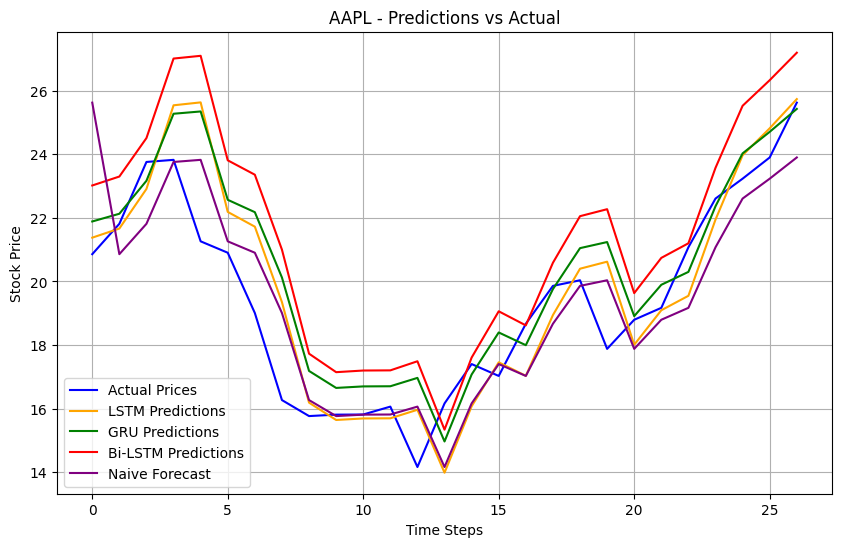


LSTM
Epoch 1/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 2/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 3/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 4/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 5/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0073
Epoch 6/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 7/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 8/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0095
Epoch 9/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 10/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 11/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0065
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 13/20
55/55 [========================

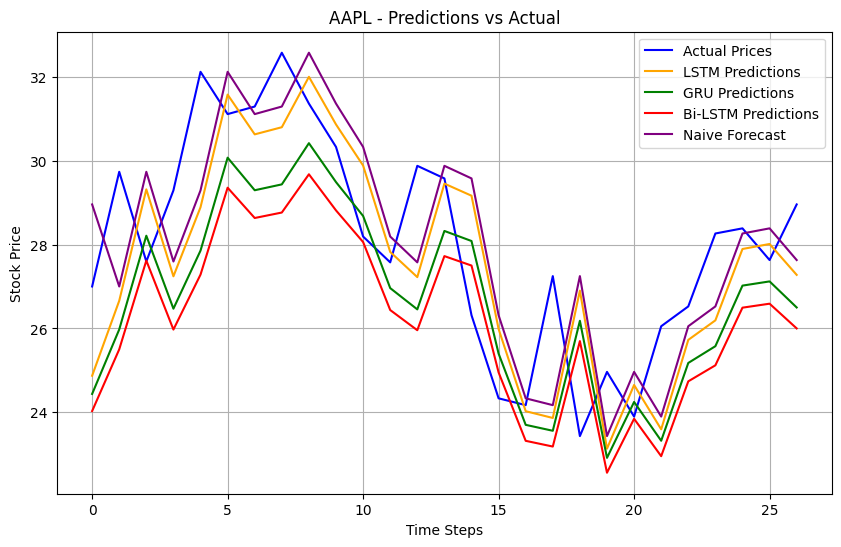


LSTM
Epoch 1/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0056
Epoch 2/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 3/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0057
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0073
Epoch 5/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 6/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0048
Epoch 7/20
83/83 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 8/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0048
Epoch 9/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 10/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0048
Epoch 11/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0058
Epoch 12/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0059
Epoch 13/20
83/83 [========================

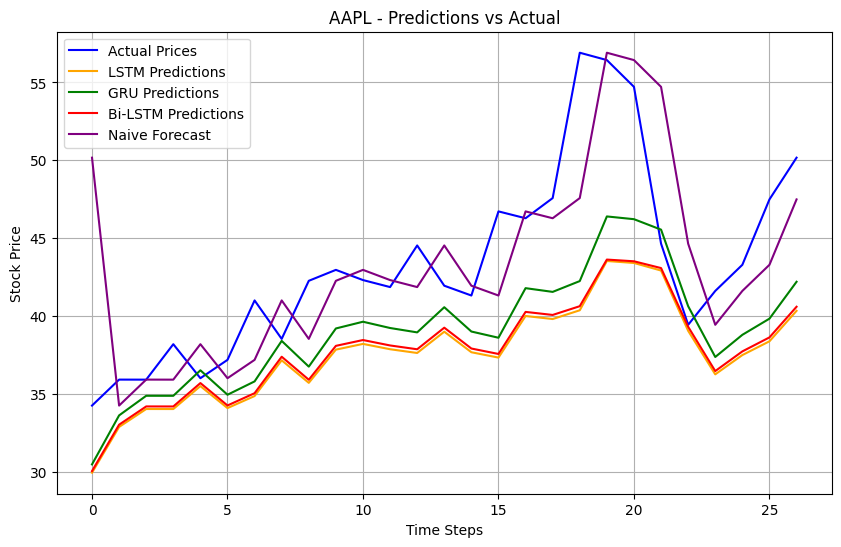


LSTM
Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0033
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 3/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 4/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 5/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0028
Epoch 6/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0031
Epoch 7/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 8/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 9/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0026
Epoch 10/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 11/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0023
Epoch 12/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0032
Epoch 13/20
111/111

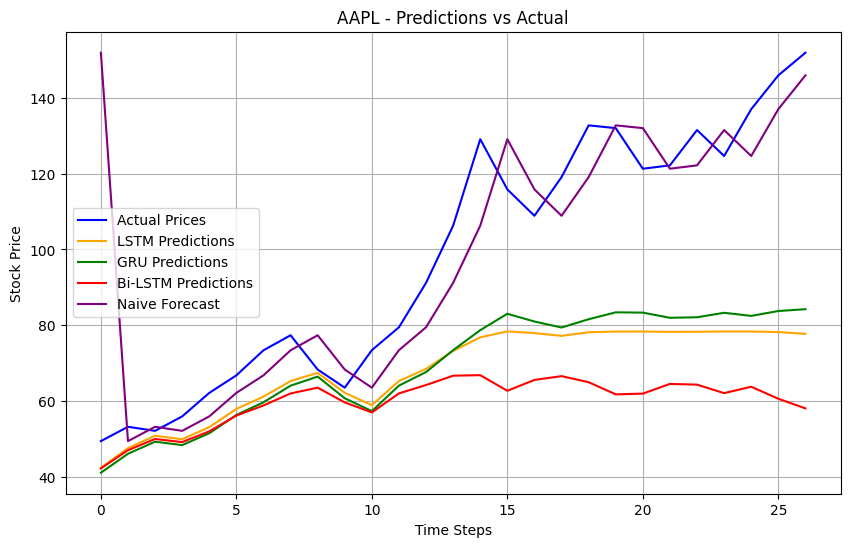


LSTM
Epoch 1/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 2/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 3/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 4/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 5/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0017
Epoch 6/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 7/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 8/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0016
Epoch 9/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 10/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 11/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 12/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0018
Epoch 13/20
139/139

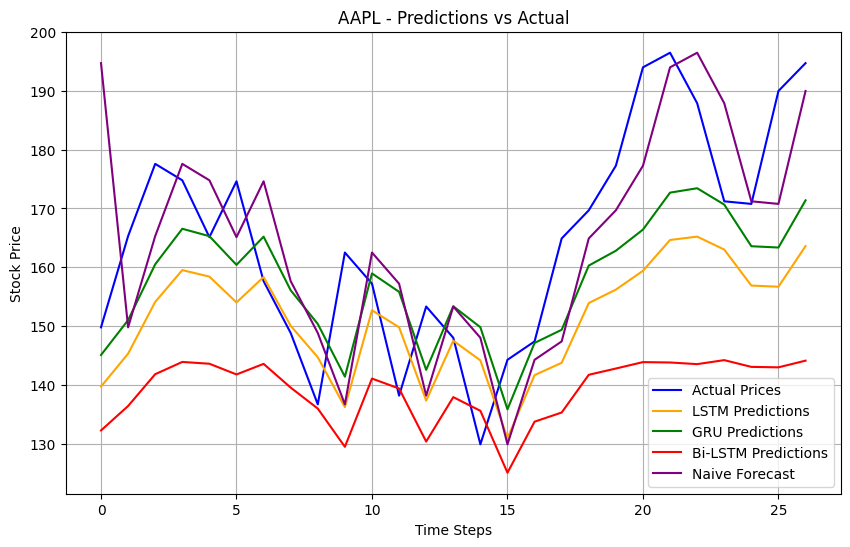

------------------------------------------------------------------
Stock: MSFT

LSTM
Epoch 1/20
27/27 [==============================] - 6s 6ms/step - loss: 0.2203
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 0.1048
Epoch 3/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0556
Epoch 4/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0530
Epoch 5/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0515
Epoch 6/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0478
Epoch 7/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0458
Epoch 8/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0413
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0374
Epoch 10/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0471
Epoch 11/20
27/27 [==============================] - 0s 6ms/step - loss: 0.0369
Epoch 12/20
27/27 [=========================

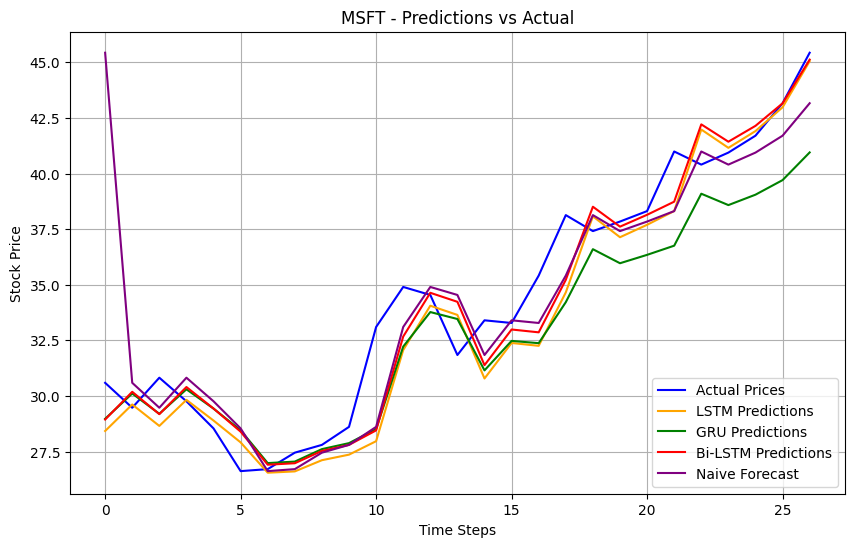


LSTM
Epoch 1/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0147
Epoch 2/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 3/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 4/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0084
Epoch 5/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0087
Epoch 6/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0081
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 8/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 13/20
55/55 [=====================

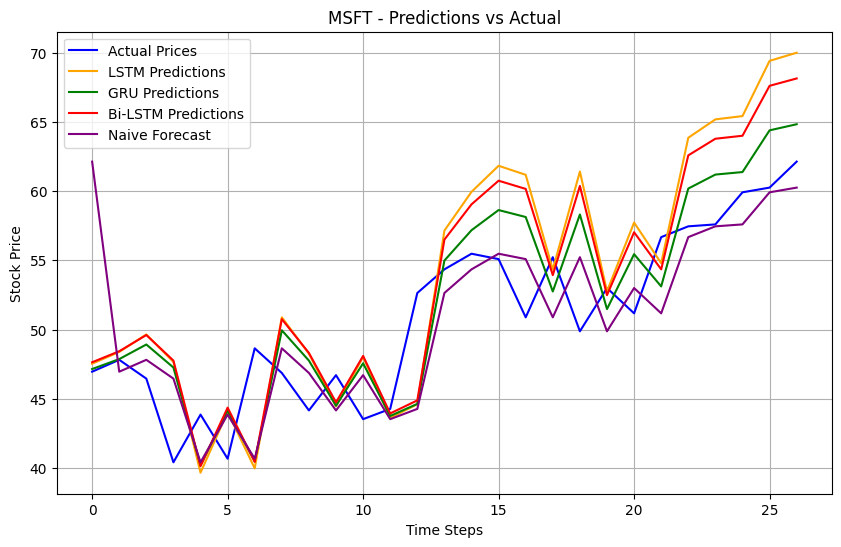


LSTM
Epoch 1/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0074
Epoch 2/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 3/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0072
Epoch 4/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 5/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0063
Epoch 6/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0069
Epoch 7/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 8/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0076
Epoch 9/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0052
Epoch 10/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0078
Epoch 11/20
83/83 [==============================] - 1s 6ms/step - loss: 0.0070
Epoch 12/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 13/20
83/83 [========================

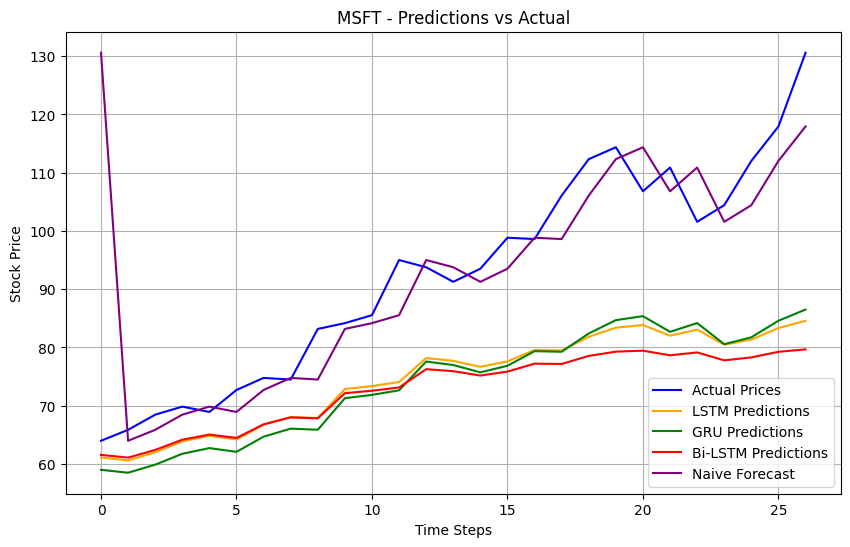


LSTM
Epoch 1/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0015
Epoch 3/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 4/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 5/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 6/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 7/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 8/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 9/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 10/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 11/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 12/20
111/111 [==============================] - 1s 6ms/step - loss: 0.0020
Epoch 13/20
111/111

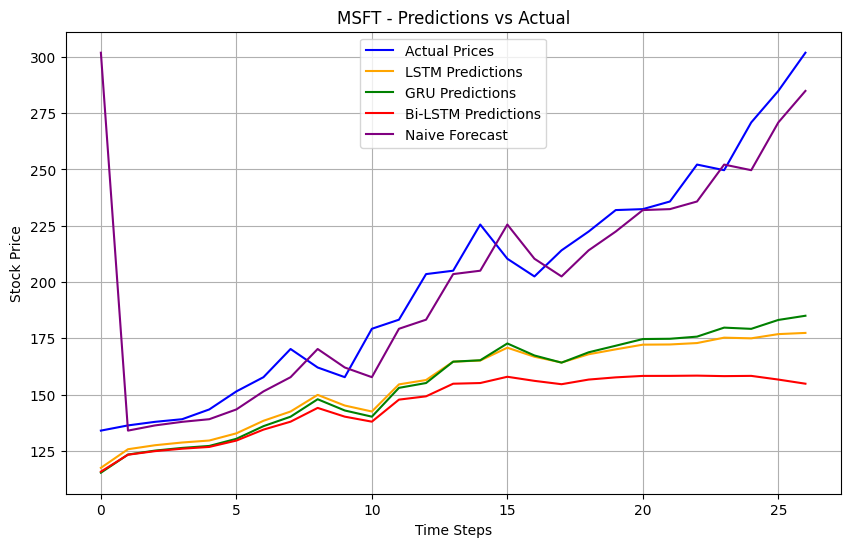


LSTM
Epoch 1/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 2/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 3/20
139/139 [==============================] - 1s 10ms/step - loss: 7.0492e-04
Epoch 4/20
139/139 [==============================] - 1s 7ms/step - loss: 9.4115e-04
Epoch 5/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 6/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 7/20
139/139 [==============================] - 1s 7ms/step - loss: 8.7998e-04
Epoch 8/20
139/139 [==============================] - 1s 7ms/step - loss: 7.4543e-04
Epoch 9/20
139/139 [==============================] - 1s 7ms/step - loss: 9.8365e-04
Epoch 10/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 11/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 12/20
139/139 [==============================] - 1s 7ms/step - loss: 0.001

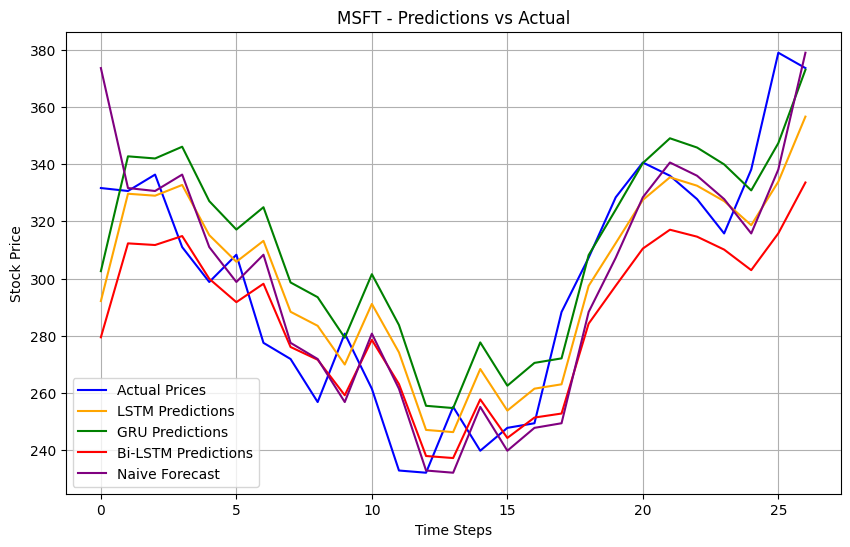

------------------------------------------------------------------
Stock: AMZN

LSTM
Epoch 1/20
27/27 [==============================] - 5s 7ms/step - loss: 0.3110
Epoch 2/20
27/27 [==============================] - 0s 7ms/step - loss: 0.1515
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0385
Epoch 4/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0398
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0287
Epoch 6/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0287
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0261
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0165
Epoch 9/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 10/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0240
Epoch 11/20
27/27 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 12/20
27/27 [=========================

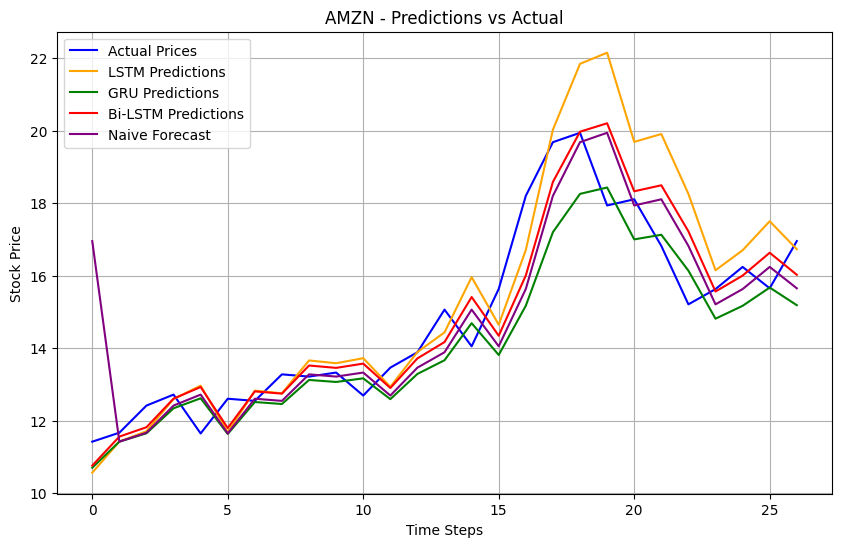


LSTM
Epoch 1/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0070
Epoch 2/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0099
Epoch 3/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0103
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 5/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0064
Epoch 6/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0048
Epoch 7/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 8/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0085
Epoch 9/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0081
Epoch 13/20
55/55 [===================

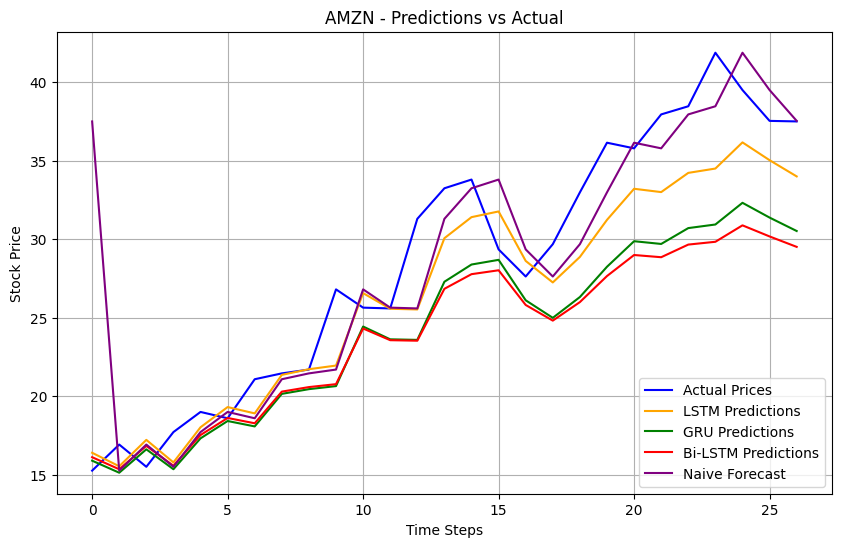


LSTM
Epoch 1/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0045
Epoch 2/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 3/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 4/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 5/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 6/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 7/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0042
Epoch 8/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 9/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 10/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 11/20
83/83 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 12/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0034
Epoch 13/20
83/83 [========================

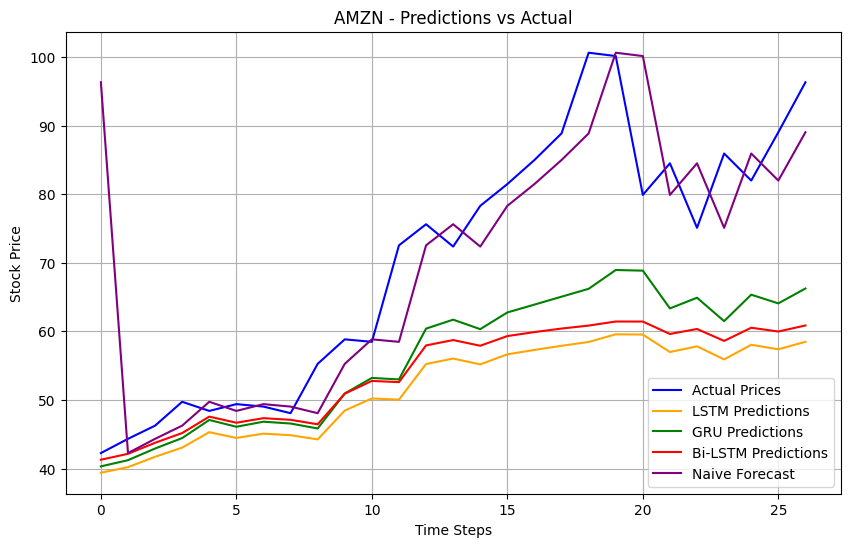


LSTM
Epoch 1/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 2/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 3/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0031
Epoch 5/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 6/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 7/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 8/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 10/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 11/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 12/20
111/111 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 13/20
111/111

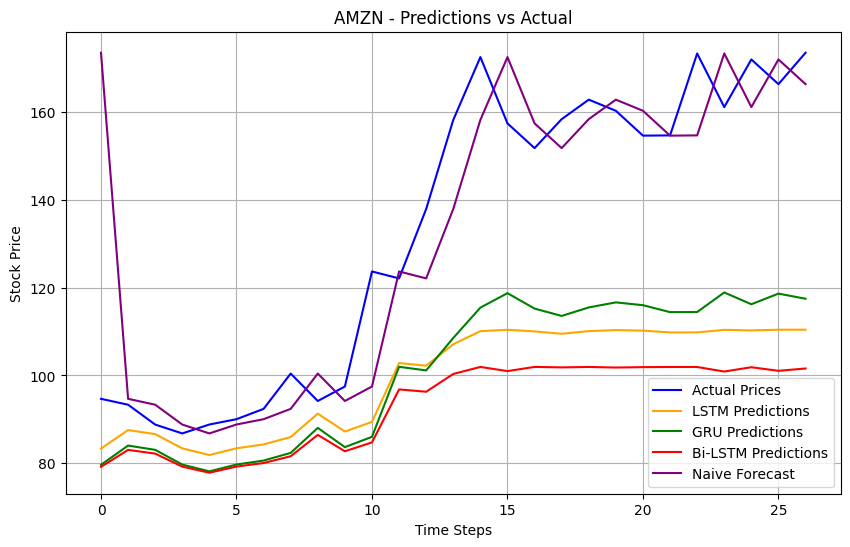


LSTM
Epoch 1/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 2/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 3/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0014
Epoch 4/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 5/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 6/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 7/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 8/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 9/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0018
Epoch 10/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 11/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 12/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 13/20
139/139

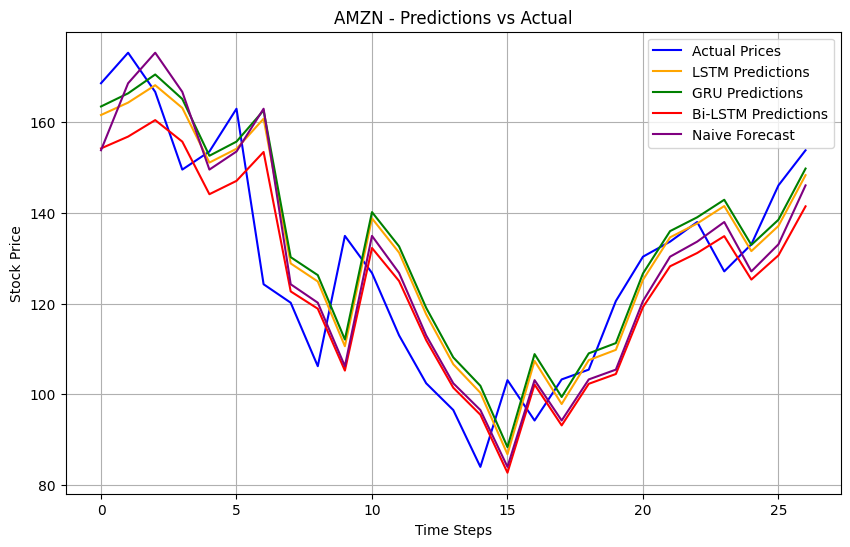

------------------------------------------------------------------
Stock: META

LSTM
Epoch 1/20
23/23 [==============================] - 6s 7ms/step - loss: 0.2416
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.1653
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0955
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0555
Epoch 5/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0472
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0399
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0357
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 10/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 11/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 12/20
23/23 [======================

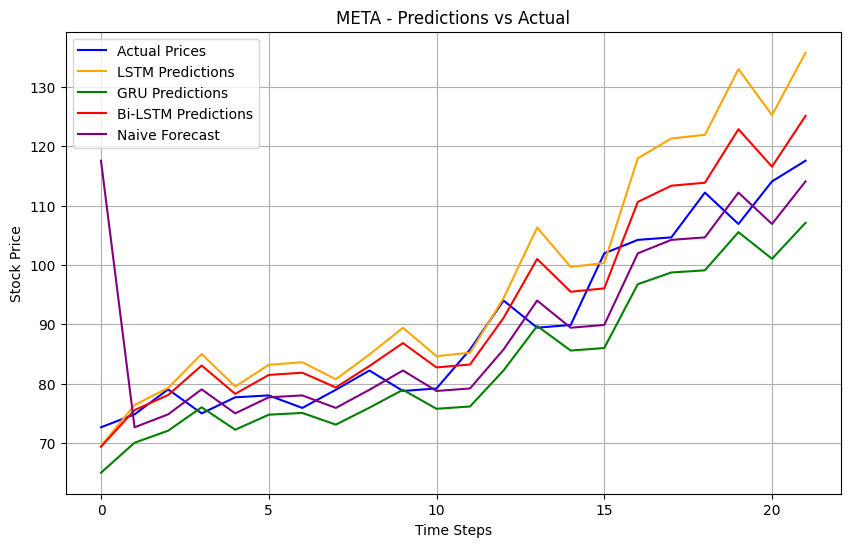


LSTM
Epoch 1/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 2/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 3/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 4/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 5/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 6/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 7/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 8/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 9/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 10/20
46/46 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 11/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 12/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 13/20
46/46 [========================

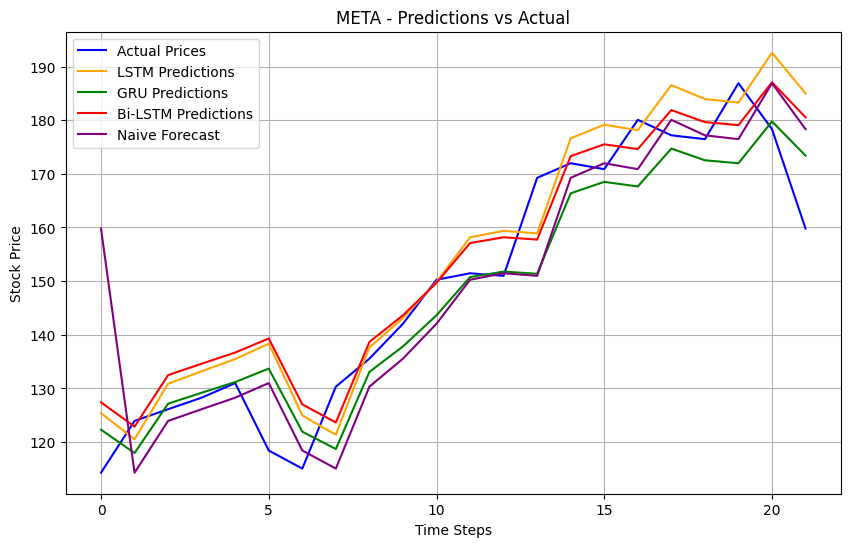


LSTM
Epoch 1/20
69/69 [==============================] - 1s 10ms/step - loss: 0.0040
Epoch 2/20
69/69 [==============================] - 1s 9ms/step - loss: 0.0038
Epoch 3/20
69/69 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 4/20
69/69 [==============================] - 1s 10ms/step - loss: 0.0029
Epoch 5/20
69/69 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 6/20
69/69 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 7/20
69/69 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 8/20
69/69 [==============================] - 1s 8ms/step - loss: 0.0034
Epoch 9/20
69/69 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 10/20
69/69 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 11/20
69/69 [==============================] - 1s 8ms/step - loss: 0.0035
Epoch 12/20
69/69 [==============================] - 1s 7ms/step - loss: 0.0038
Epoch 13/20
69/69 [======================

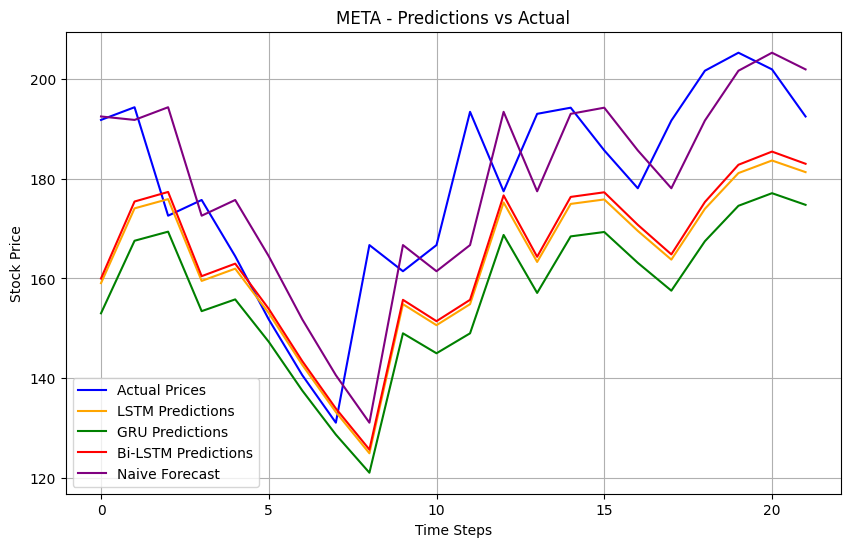


LSTM
Epoch 1/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0045
Epoch 2/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0048
Epoch 3/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 4/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0044
Epoch 5/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0040
Epoch 6/20
92/92 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 7/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 8/20
92/92 [==============================] - 1s 10ms/step - loss: 0.0039
Epoch 9/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 10/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 11/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0042
Epoch 12/20
92/92 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 13/20
92/92 [=======================

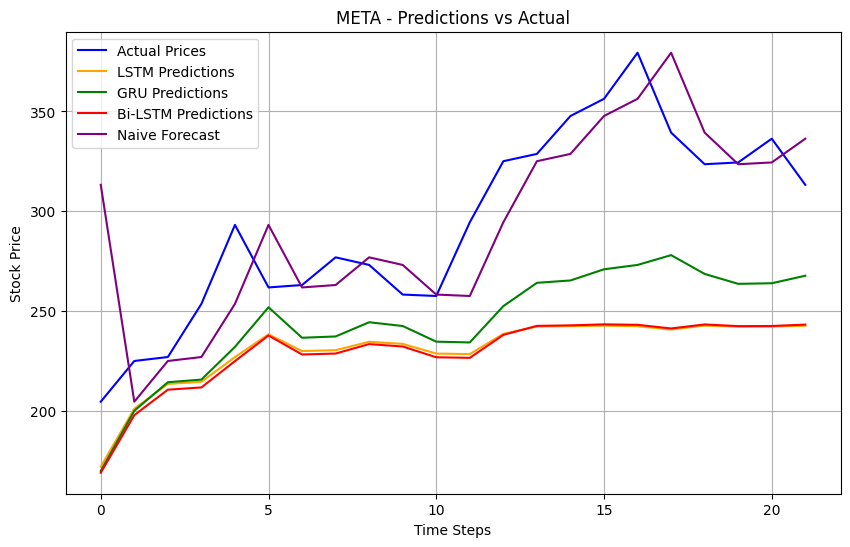


LSTM
Epoch 1/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 2/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 3/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 4/20
115/115 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 5/20
115/115 [==============================] - 1s 9ms/step - loss: 0.0016
Epoch 6/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 7/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0025
Epoch 8/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 9/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 10/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 11/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 12/20
115/115 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 13/20
115/11

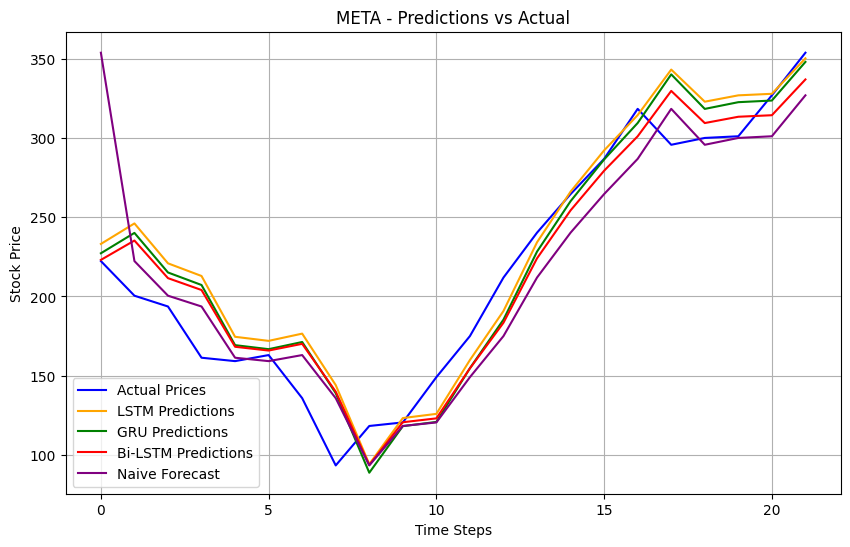

------------------------------------------------------------------
Stock: GOOGL

LSTM
Epoch 1/20
27/27 [==============================] - 5s 7ms/step - loss: 0.3405
Epoch 2/20
27/27 [==============================] - 0s 9ms/step - loss: 0.1737
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0532
Epoch 4/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0556
Epoch 5/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0571
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0535
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0499
Epoch 9/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0534
Epoch 10/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0547
Epoch 11/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0503
Epoch 12/20
27/27 [========================

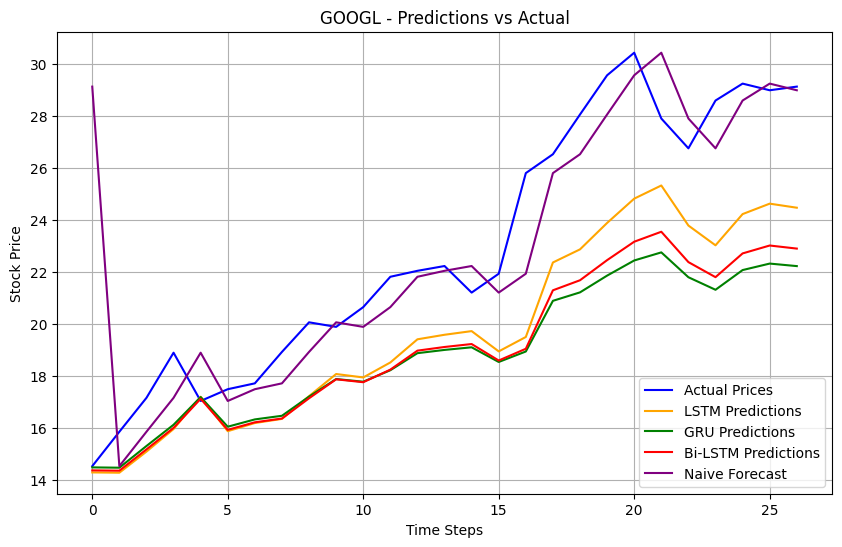


LSTM
Epoch 1/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0274
Epoch 2/20
55/55 [==============================] - 1s 9ms/step - loss: 0.0166
Epoch 3/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 5/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 6/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 7/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 8/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 9/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0059
Epoch 11/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 12/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 13/20
55/55 [=======================

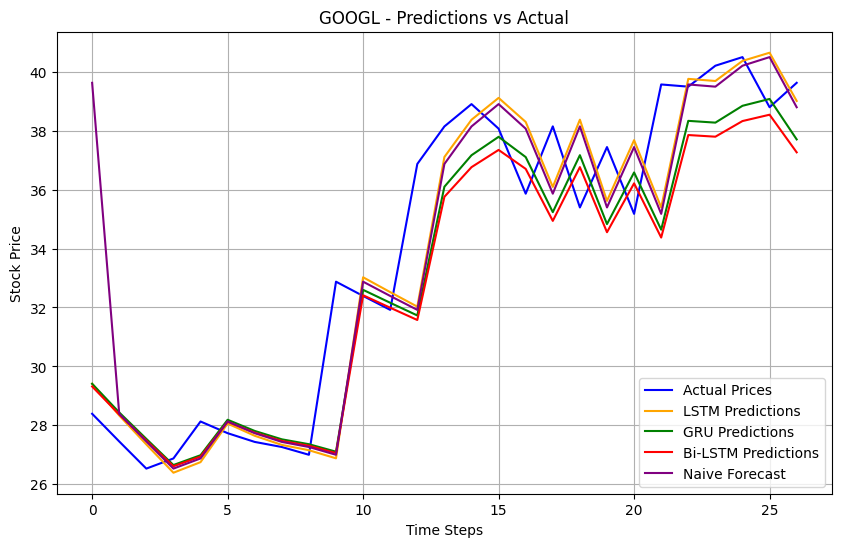


LSTM
Epoch 1/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 2/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 3/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0051
Epoch 4/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0042
Epoch 5/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0045
Epoch 6/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0044
Epoch 7/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0052
Epoch 8/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 9/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0029
Epoch 10/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0064
Epoch 11/20
83/83 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 12/20
83/83 [==============================] - 1s 8ms/step - loss: 0.0050
Epoch 13/20
83/83 [========================

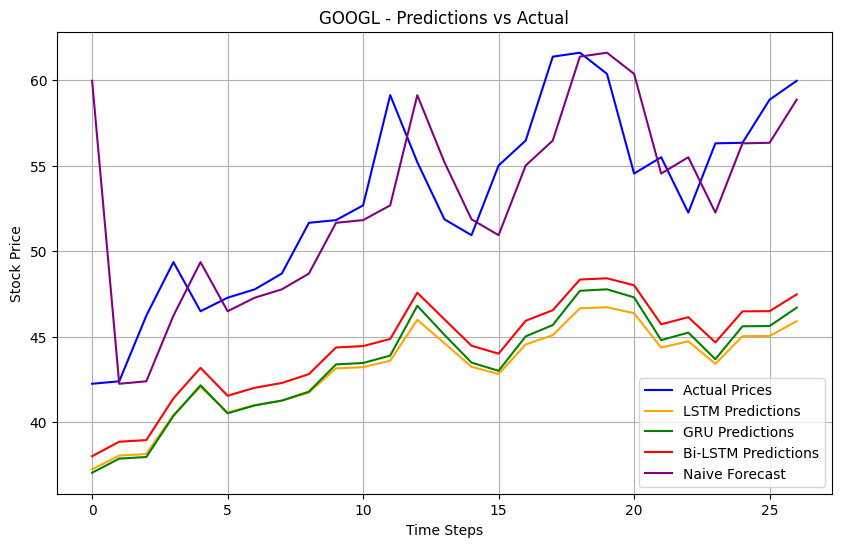


LSTM
Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0032
Epoch 2/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0026
Epoch 3/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0032
Epoch 4/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0037
Epoch 5/20
111/111 [==============================] - 1s 10ms/step - loss: 0.0026
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 7/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0023
Epoch 8/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 9/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 10/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0027
Epoch 11/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 12/20
111/111 [==============================] - 1s 9ms/step - loss: 0.0031
Epoch 13/20
111/11

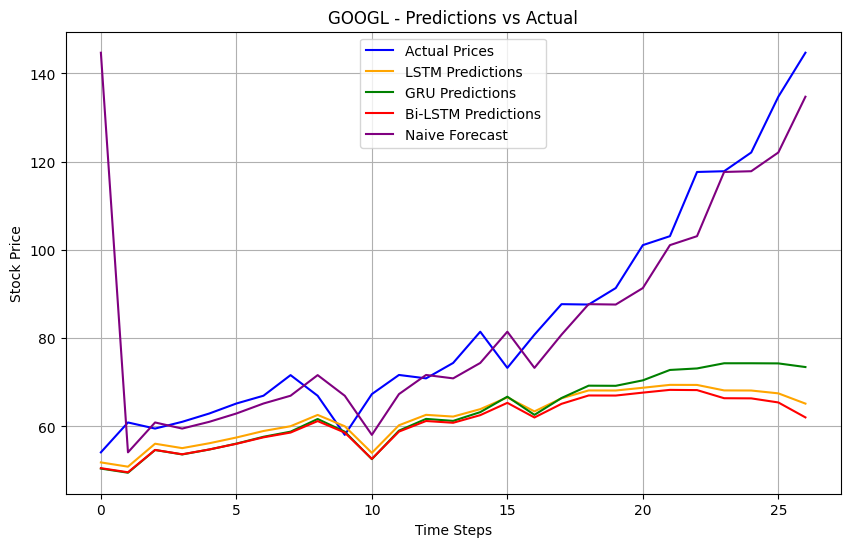


LSTM
Epoch 1/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 2/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 3/20
139/139 [==============================] - 1s 9ms/step - loss: 8.9242e-04
Epoch 4/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0010
Epoch 5/20
139/139 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 6/20
139/139 [==============================] - 1s 9ms/step - loss: 9.5776e-04
Epoch 7/20
139/139 [==============================] - 1s 9ms/step - loss: 8.4676e-04
Epoch 8/20
139/139 [==============================] - 1s 8ms/step - loss: 9.7822e-04
Epoch 9/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 10/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0010
Epoch 11/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 12/20
139/139 [==============================] - 1s 9ms/step - loss: 0.0010
Ep

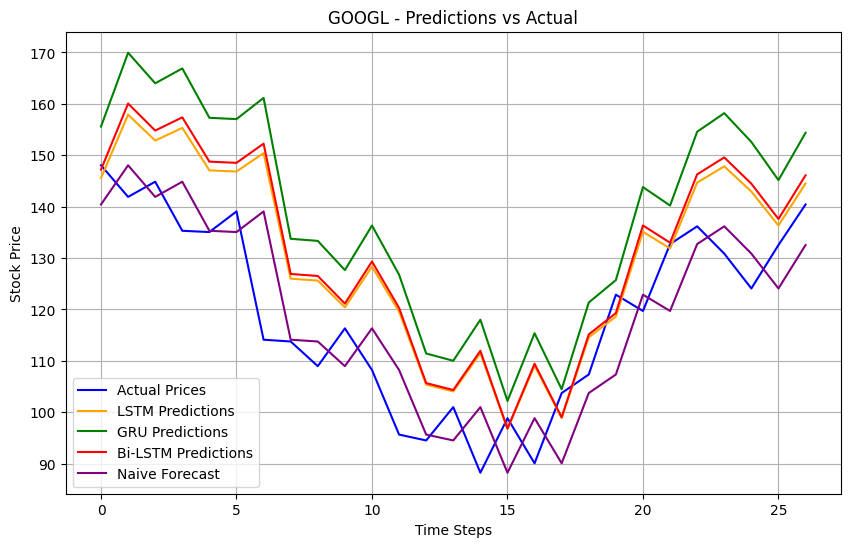

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Number of splits for time series cross-validation
cv_n_splits = 5

# Create TimeSeriesSplit object
tss = TimeSeriesSplit(n_splits=cv_n_splits)

# Define more complex models outside the loop
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_gru_model():
    model = Sequential()
    model.add(GRU(100, input_shape=(1, 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def create_bi_lstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(100, input_shape=(1, 1), return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Metrics for evaluation
evaluation_metrics = {'LSTM': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'GRU': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'Bi-LSTM': {'MAE': [], 'MSE': [], 'MAPE': []},
                      'Naive Forecast': {'MAE': [], 'MSE': [], 'MAPE': []}}



# Iterate over each stock's data and perform time series cross-validation
for symbol, stock_data in filtered_historical_data.items():

    print('------------------------------------------------------------------')
    print(f"Stock: {symbol}")
    # Create models
    lstm_model = create_lstm_model()
    gru_model = create_gru_model()
    bi_lstm_model = create_bi_lstm_model()

    for train_index, test_index in tss.split(stock_data):
        train_data, test_data = stock_data.iloc[train_index], stock_data.iloc[test_index]

        # Extract 'Close' prices
        train_close_prices = train_data['Close'].values.reshape(-1, 1)
        test_close_prices = test_data['Close'].values.reshape(-1, 1)

        # Normalize 'Close' prices using MinMaxScaler fitted on the training data
        scaler = MinMaxScaler()
        train_close_prices_normalized = scaler.fit_transform(train_close_prices)
        test_close_prices_normalized = scaler.transform(test_close_prices)

        # Prepare feature and target data for training
        X_train = train_close_prices_normalized[:-1]
        y_train = train_close_prices_normalized[1:]

        # Reshape data for LSTM and GRU input shape (samples, time steps, features)
        X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

        # Train models
        print('\nLSTM')
        lstm_model.fit(X_train, y_train, epochs=20, batch_size=1)
        print('\nGRU')
        gru_model.fit(X_train, y_train, epochs=20, batch_size=1)
        print('\nBi-LSTM')
        bi_lstm_model.fit(X_train, y_train, epochs=20, batch_size=1)

        # Prepare test data for predictions
        X_test = test_close_prices_normalized[:-1]
        y_test = test_close_prices_normalized[1:]
        X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

        # Make predictions
        lstm_predictions = lstm_model.predict(X_test)
        gru_predictions = gru_model.predict(X_test)
        bi_lstm_predictions = bi_lstm_model.predict(X_test)

        # Reverse the normalization to get actual prices
        lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)
        gru_predictions_actual = scaler.inverse_transform(gru_predictions)
        bi_lstm_predictions_actual = scaler.inverse_transform(bi_lstm_predictions)
        y_test_actual = scaler.inverse_transform(y_test)

        # Evaluate models
        lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions_actual)
        lstm_mse = mean_squared_error(y_test_actual, lstm_predictions_actual)
        lstm_mape = np.mean(np.abs((y_test_actual - lstm_predictions_actual) / y_test_actual)) * 100

        gru_mae = mean_absolute_error(y_test_actual, gru_predictions_actual)
        gru_mse = mean_squared_error(y_test_actual, gru_predictions_actual)
        gru_mape = np.mean(np.abs((y_test_actual - gru_predictions_actual) / y_test_actual)) * 100

        bi_lstm_mae = mean_absolute_error(y_test_actual, bi_lstm_predictions_actual)
        bi_lstm_mse = mean_squared_error(y_test_actual, bi_lstm_predictions_actual)
        bi_lstm_mape = np.mean(np.abs((y_test_actual - bi_lstm_predictions_actual) / y_test_actual)) * 100

        # Evaluate Naive Forecast
        naive_forecast_predictions_actual = np.roll(y_test_actual, shift=1)
        naive_forecast_mae = mean_absolute_error(y_test_actual[1:], naive_forecast_predictions_actual[1:])
        naive_forecast_mse = mean_squared_error(y_test_actual[1:], naive_forecast_predictions_actual[1:])
        naive_forecast_mape = np.mean(np.abs((y_test_actual[1:] - naive_forecast_predictions_actual[1:]) / y_test_actual[1:])) * 100

        print(f"LSTM - MAE: {lstm_mae}, MSE: {lstm_mse}, MAPE: {lstm_mape}%")
        print(f"GRU - MAE: {gru_mae}, MSE: {gru_mse}, MAPE: {gru_mape}%")
        print(f"Bi-LSTM - MAE: {bi_lstm_mae}, MSE: {bi_lstm_mse}, MAPE: {bi_lstm_mape}%")
        print(f"Naive Forecast - MAE: {naive_forecast_mae}, MSE: {naive_forecast_mse}, MAPE: {naive_forecast_mape}%")

        # Record metrics for comparison
        evaluation_metrics['LSTM']['MAE'].append(lstm_mae)
        evaluation_metrics['LSTM']['MSE'].append(lstm_mse)
        evaluation_metrics['LSTM']['MAPE'].append(lstm_mape)

        evaluation_metrics['GRU']['MAE'].append(gru_mae)
        evaluation_metrics['GRU']['MSE'].append(gru_mse)
        evaluation_metrics['GRU']['MAPE'].append(gru_mape)

        evaluation_metrics['Bi-LSTM']['MAE'].append(bi_lstm_mae)
        evaluation_metrics['Bi-LSTM']['MSE'].append(bi_lstm_mse)
        evaluation_metrics['Bi-LSTM']['MAPE'].append(bi_lstm_mape)

        evaluation_metrics['Naive Forecast']['MAE'].append(naive_forecast_mae)
        evaluation_metrics['Naive Forecast']['MSE'].append(naive_forecast_mse)
        evaluation_metrics['Naive Forecast']['MAPE'].append(naive_forecast_mape)

        # Plot predictions vs actual for each model
        plt.figure(figsize=(10, 6))
        plt.plot(y_test_actual, label='Actual Prices', color='blue')
        plt.plot(lstm_predictions_actual, label='LSTM Predictions', color='orange')
        plt.plot(gru_predictions_actual, label='GRU Predictions', color='green')
        plt.plot(bi_lstm_predictions_actual, label='Bi-LSTM Predictions', color='red')
        plt.plot(naive_forecast_predictions_actual, label='Naive Forecast', color='purple')
        plt.title(f'{symbol} - Predictions vs Actual')
        plt.xlabel('Time Steps')
        plt.ylabel('Stock Price')
        plt.grid('both')
        plt.legend()
        plt.show()




In [ ]:
# Compare models including Naive Forecast based on metrics
for model_name, metrics in evaluation_metrics.items():
    avg_mae = np.mean(metrics['MAE'])
    avg_mse = np.mean(metrics['MSE'])
    avg_mape = np.mean(metrics['MAPE'])

    print(f"\n{model_name} Model Average Metrics:")
    print(f"Average MAE: {avg_mae}")
    print(f"Average MSE: {avg_mse}")
    print(f"Average MAPE: {avg_mape}%")


LSTM Model Average Metrics:
Average MAE: 14.866079677234998
Average MSE: 627.941956843117
Average MAPE: 12.439795865565833%

GRU Model Average Metrics:
Average MAE: 14.289728968456538
Average MSE: 519.0291576325594
Average MAPE: 12.38630547938123%

Bi-LSTM Model Average Metrics:
Average MAE: 16.33714883335512
Average MSE: 761.741427406459
Average MAPE: 13.54413382995859%

Naive Forecast Model Average Metrics:
Average MAE: 6.55390425650628
Average MSE: 107.24852410198831
Average MAPE: 6.012712084943981%
